In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,roc_auc_score,f1_score,recall_score,precision_score,precision_recall_curve


In [4]:
df = pd.read_csv("C:\\Users\\ssnan\\Downloads\\INNHotelsGroup.csv")

In [6]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
df.shape

(36275, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [13]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [16]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [17]:
df.duplicated().sum()

0

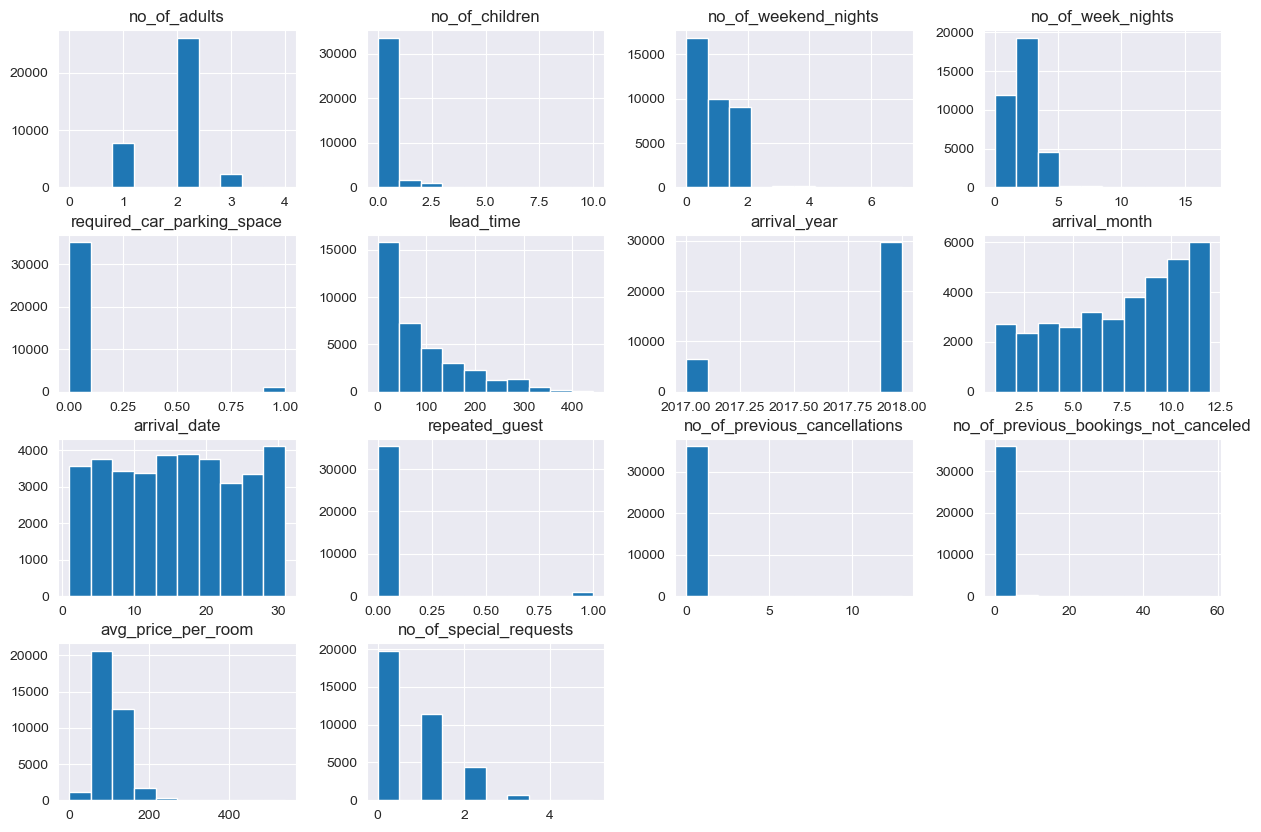

In [20]:
sns.set_style("darkgrid")
df.hist(figsize=(15,10))
plt.show()

In [21]:
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})


In [22]:
df["booking_status"].value_counts()

booking_status
0    24390
1    11885
Name: count, dtype: int64

In [23]:
df.duplicated().sum()

0

<Axes: xlabel='booking_status', ylabel='count'>

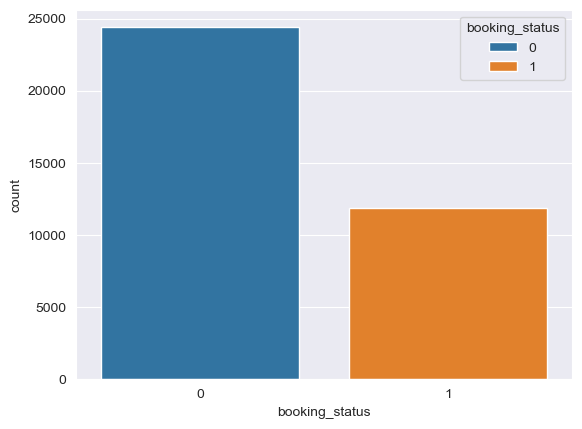

In [24]:
sns.countplot(data=df,x="booking_status",hue="booking_status")

<Axes: xlabel='booking_status', ylabel='Count'>

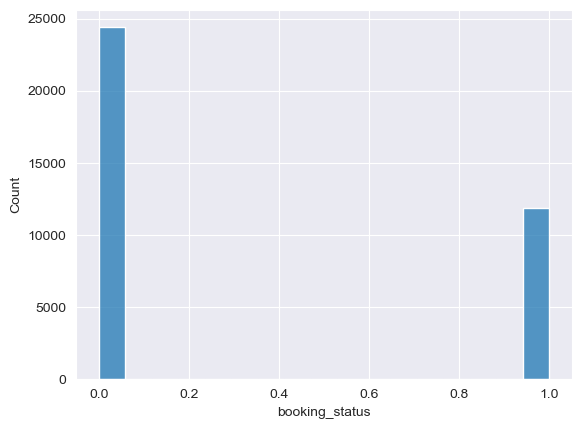

In [25]:
sns.histplot(data=df,x="booking_status")

In [26]:
#univariate analysis

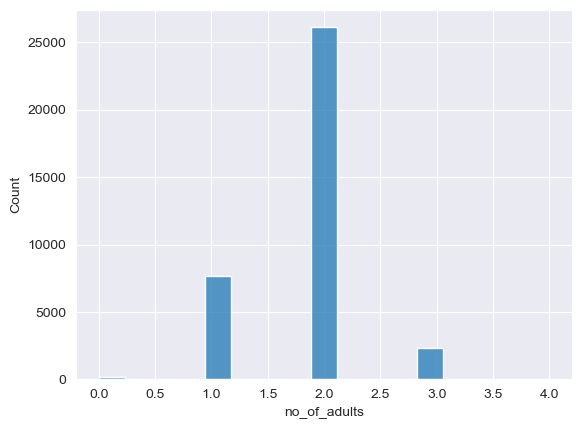

In [27]:
sns.histplot(data=df,x="no_of_adults");

In [28]:
def histogram_boxplot(df, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

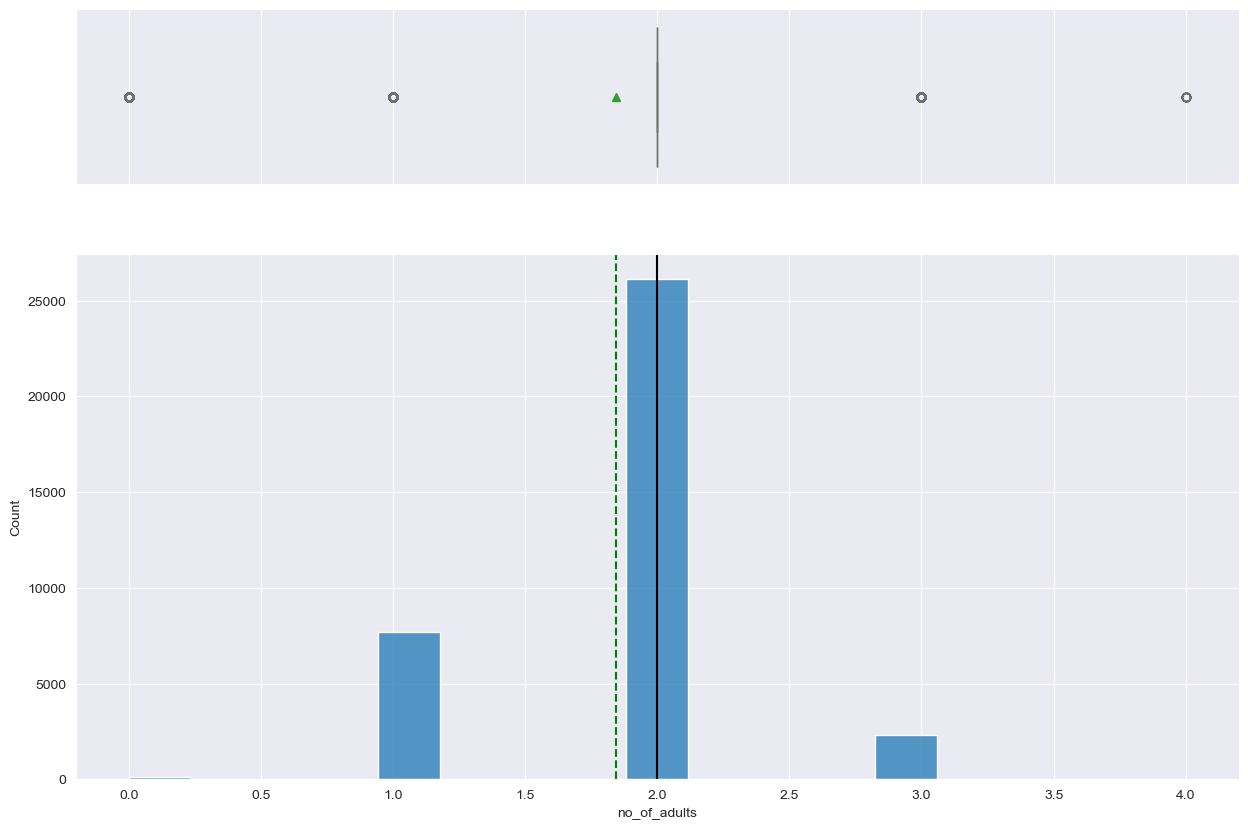

In [29]:
histogram_boxplot(df,"no_of_adults");

In [30]:
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    
    ax = sns.countplot(
        data=df,
        x=feature,
        hue=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

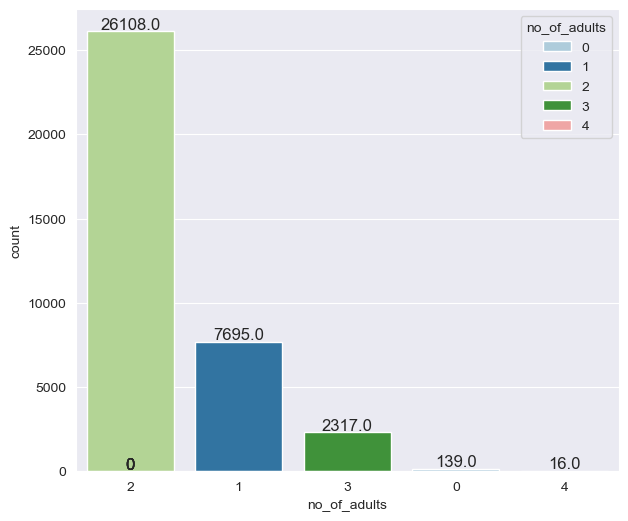

In [31]:
labeled_barplot(df,"no_of_adults")

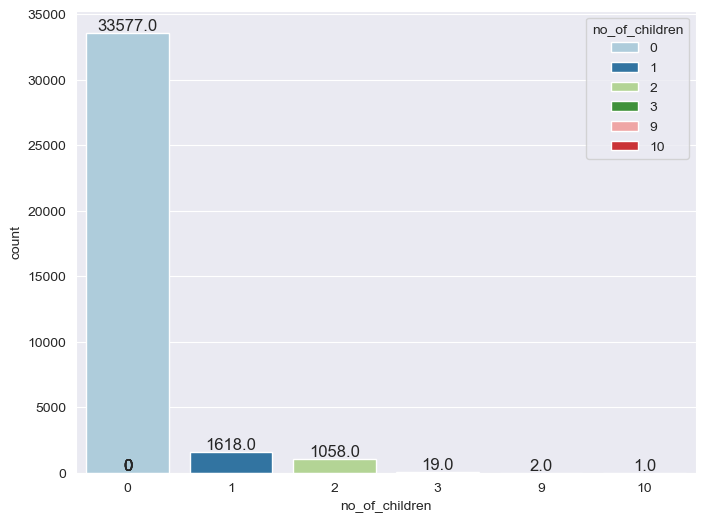

In [32]:
labeled_barplot(df,"no_of_children")

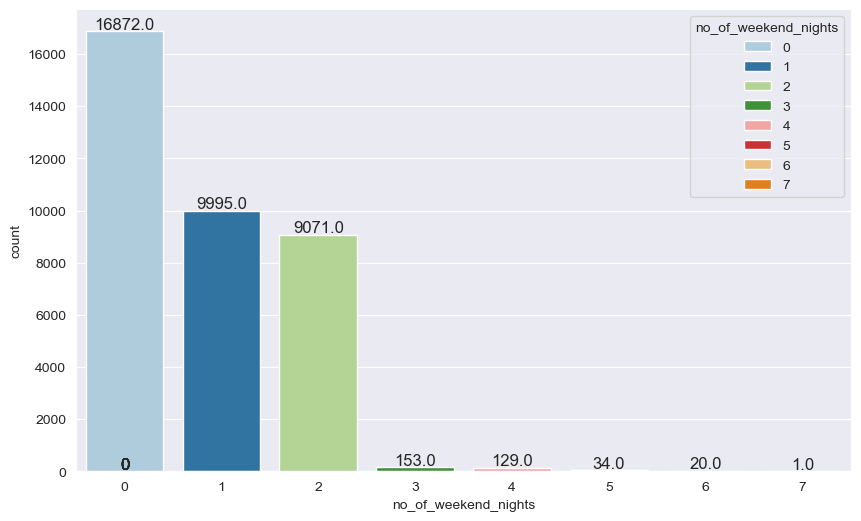

In [33]:
labeled_barplot(df,"no_of_weekend_nights")

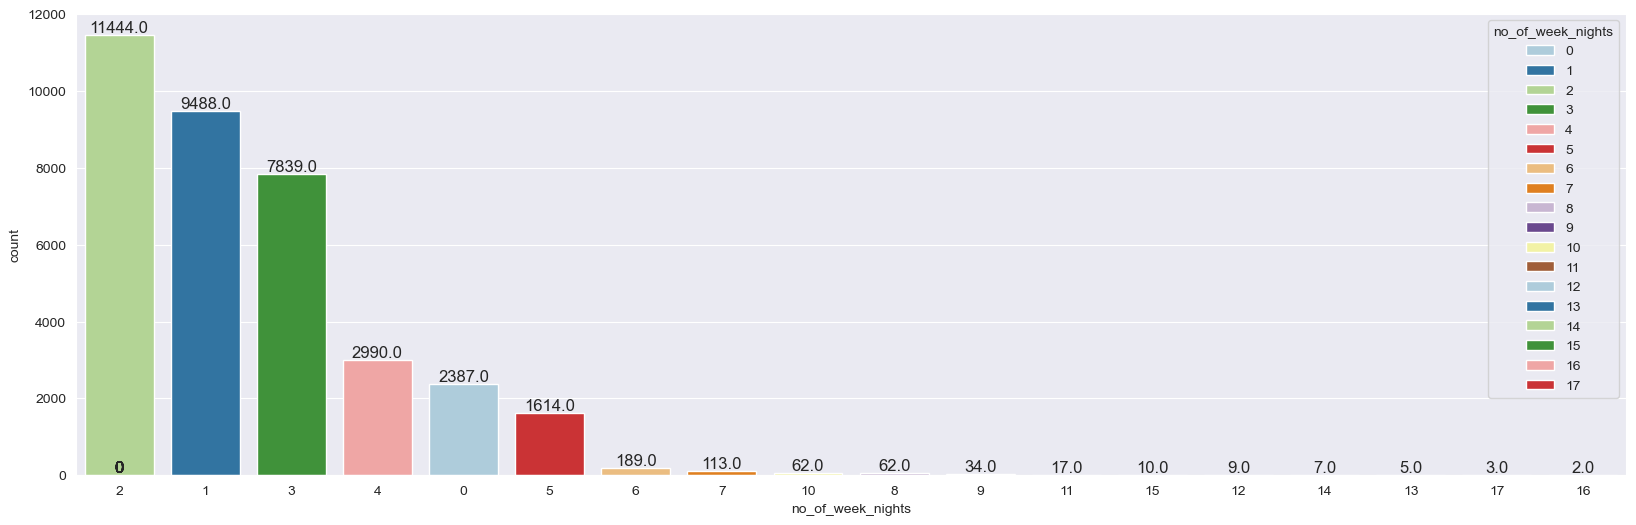

In [34]:
labeled_barplot(df,"no_of_week_nights")

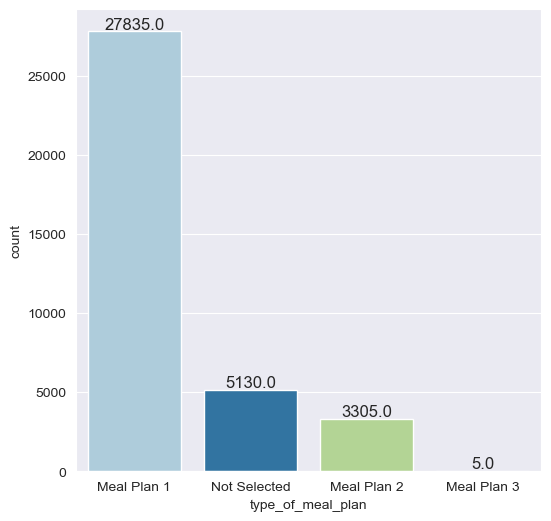

In [35]:
labeled_barplot(df,"type_of_meal_plan")

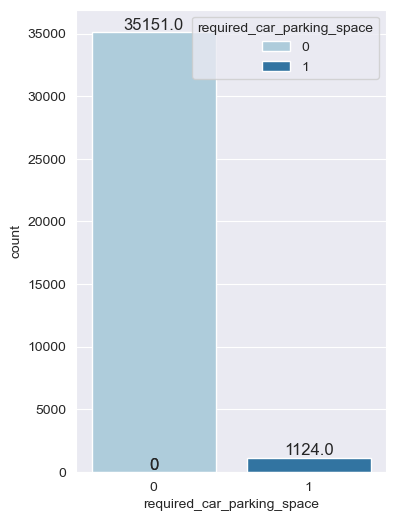

In [36]:
labeled_barplot(df,"required_car_parking_space")

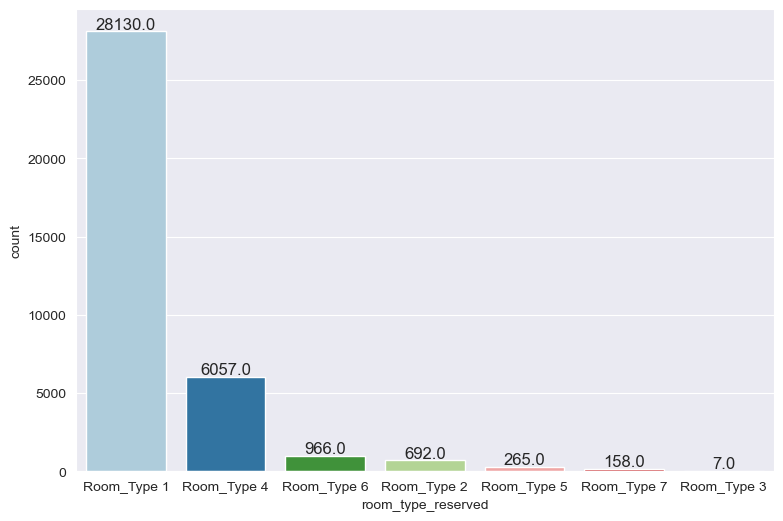

In [37]:
labeled_barplot(df,"room_type_reserved")

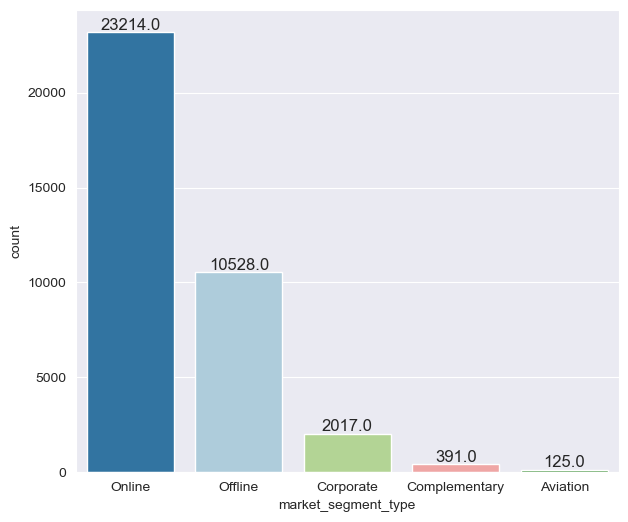

In [38]:
labeled_barplot(df,"market_segment_type")

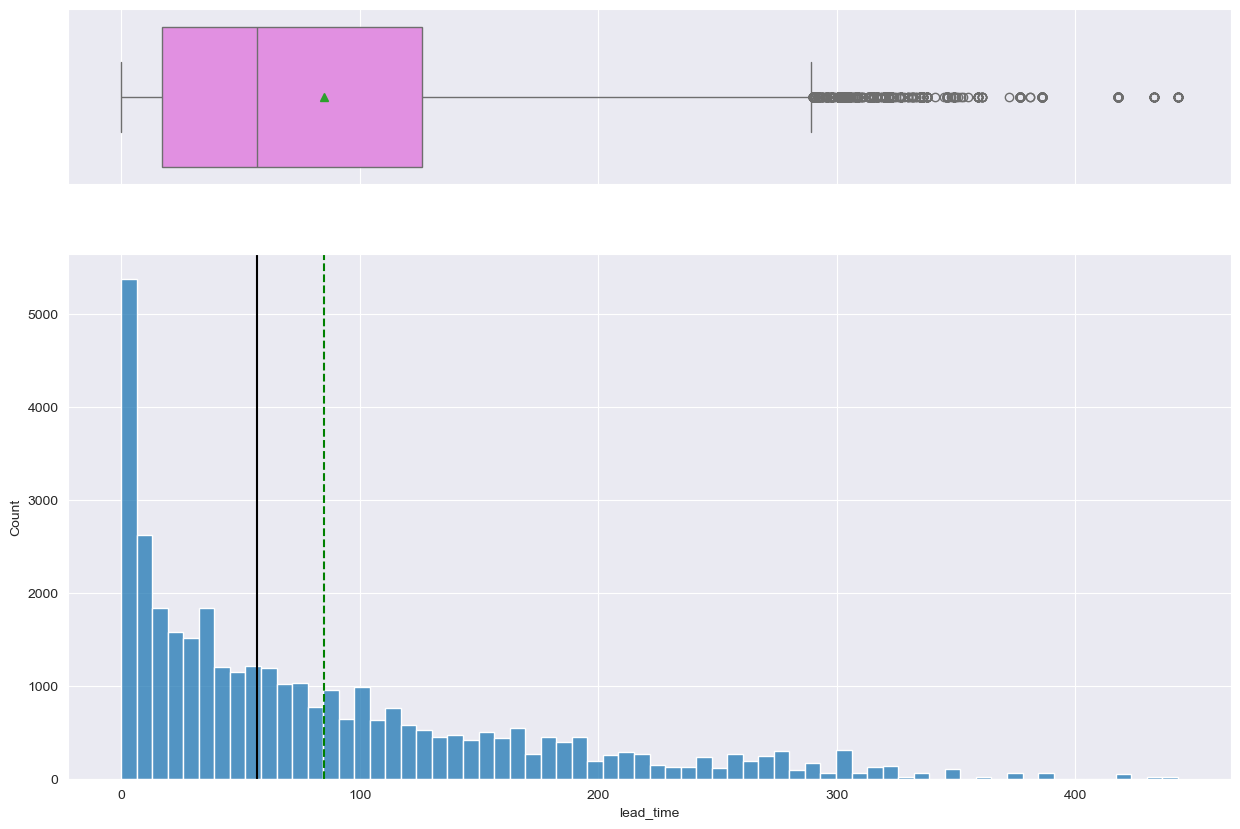

In [39]:
histogram_boxplot(df,"lead_time")

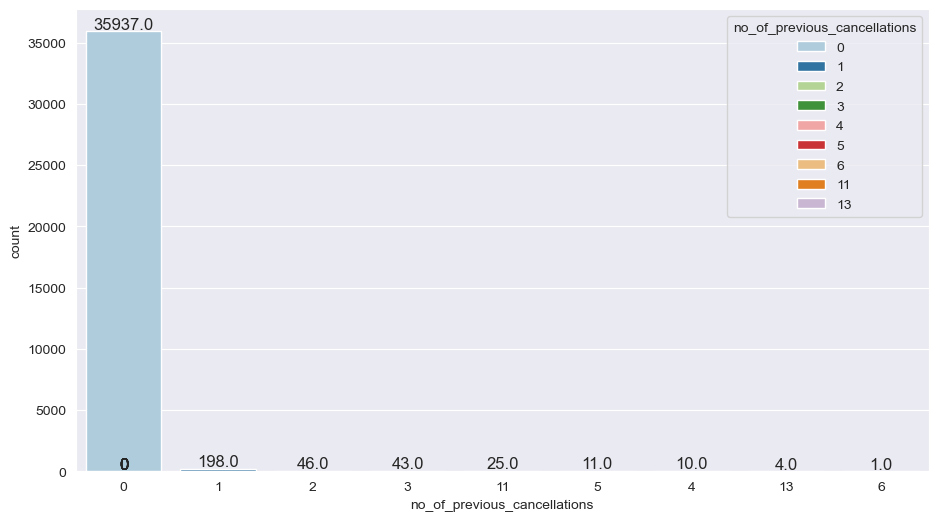

In [40]:
labeled_barplot(df,"no_of_previous_cancellations")

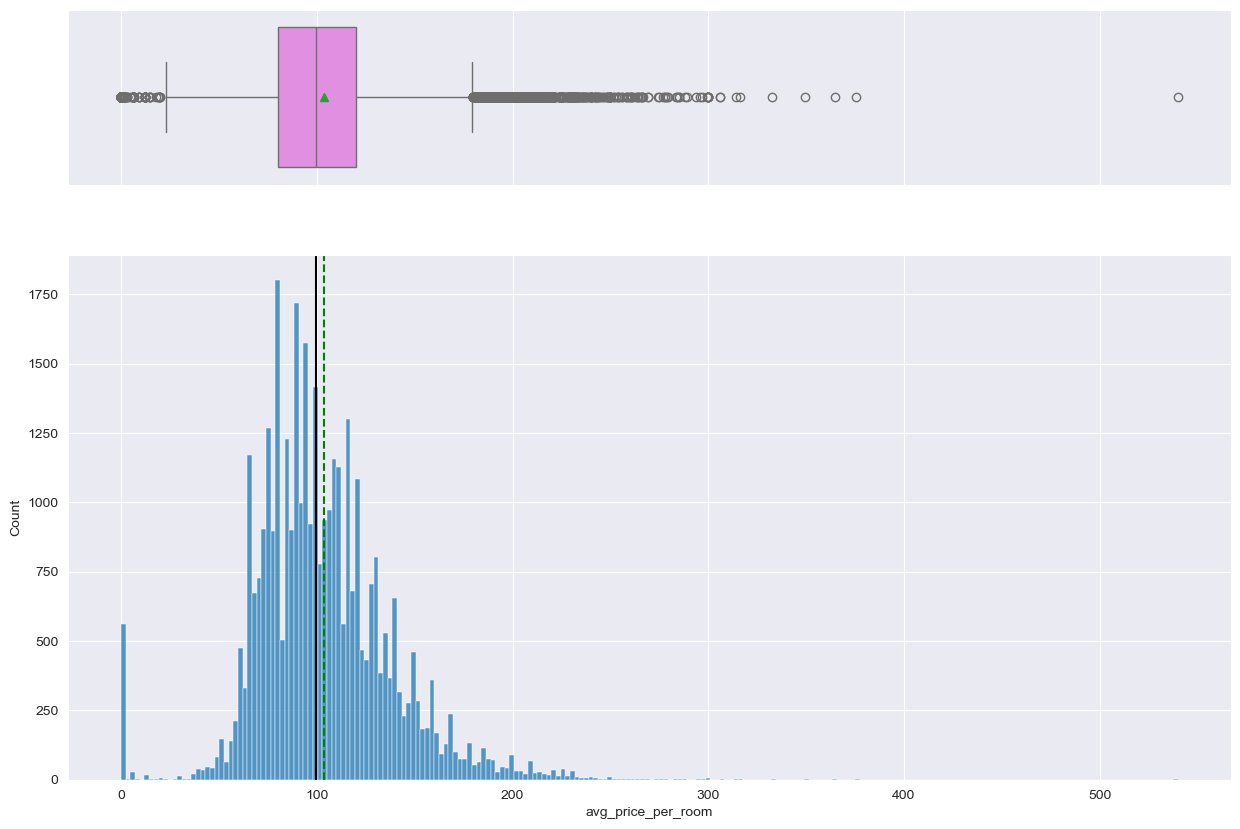

In [41]:
histogram_boxplot(df,"avg_price_per_room")

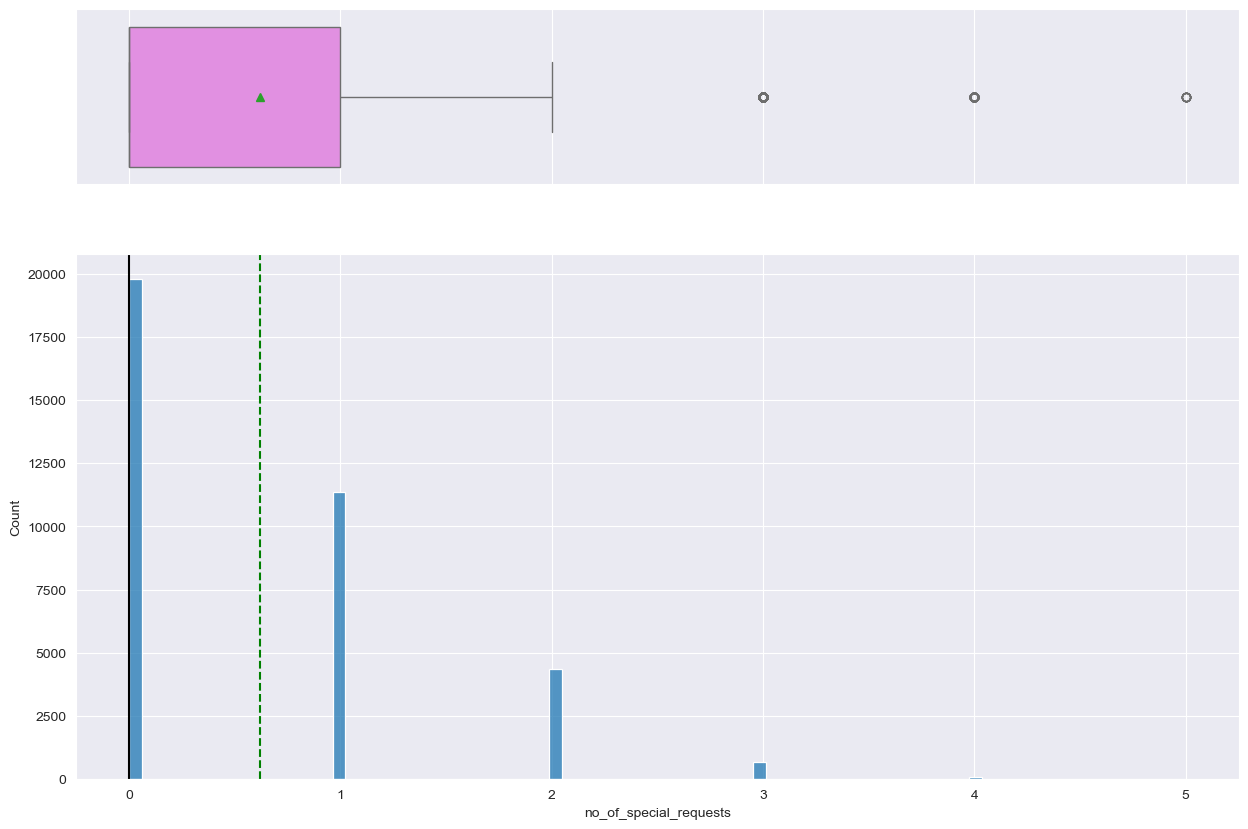

In [42]:
histogram_boxplot(df,"no_of_special_requests")

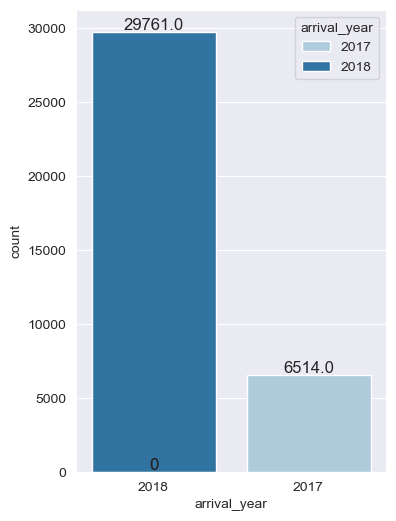

In [43]:
labeled_barplot(df,"arrival_year")

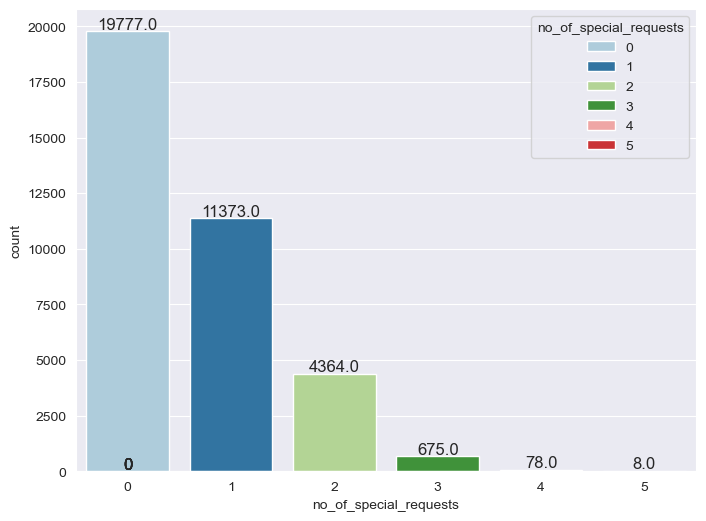

In [44]:
labeled_barplot(df,"no_of_special_requests")

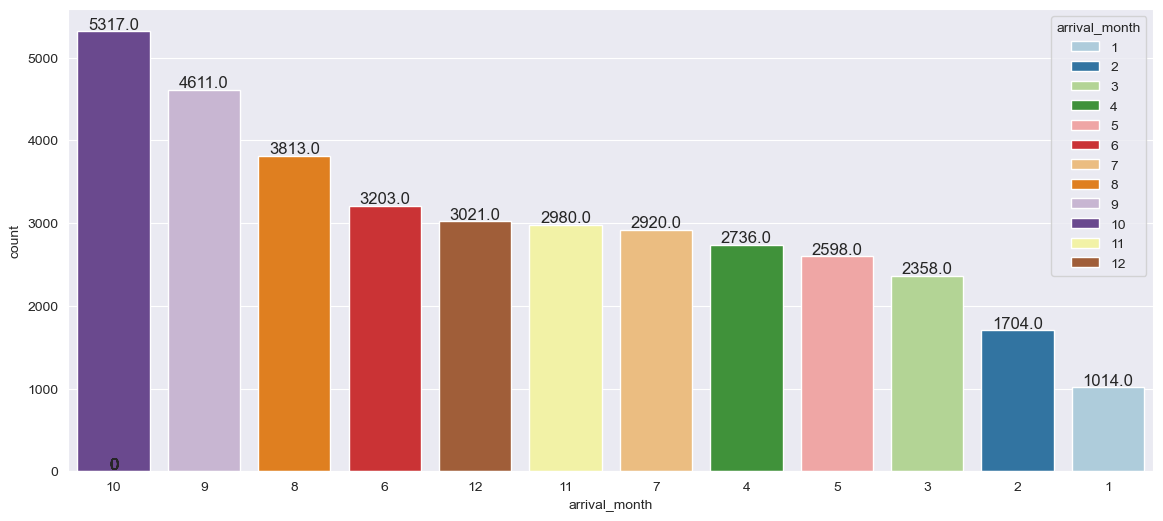

In [45]:
labeled_barplot(df,"arrival_month")

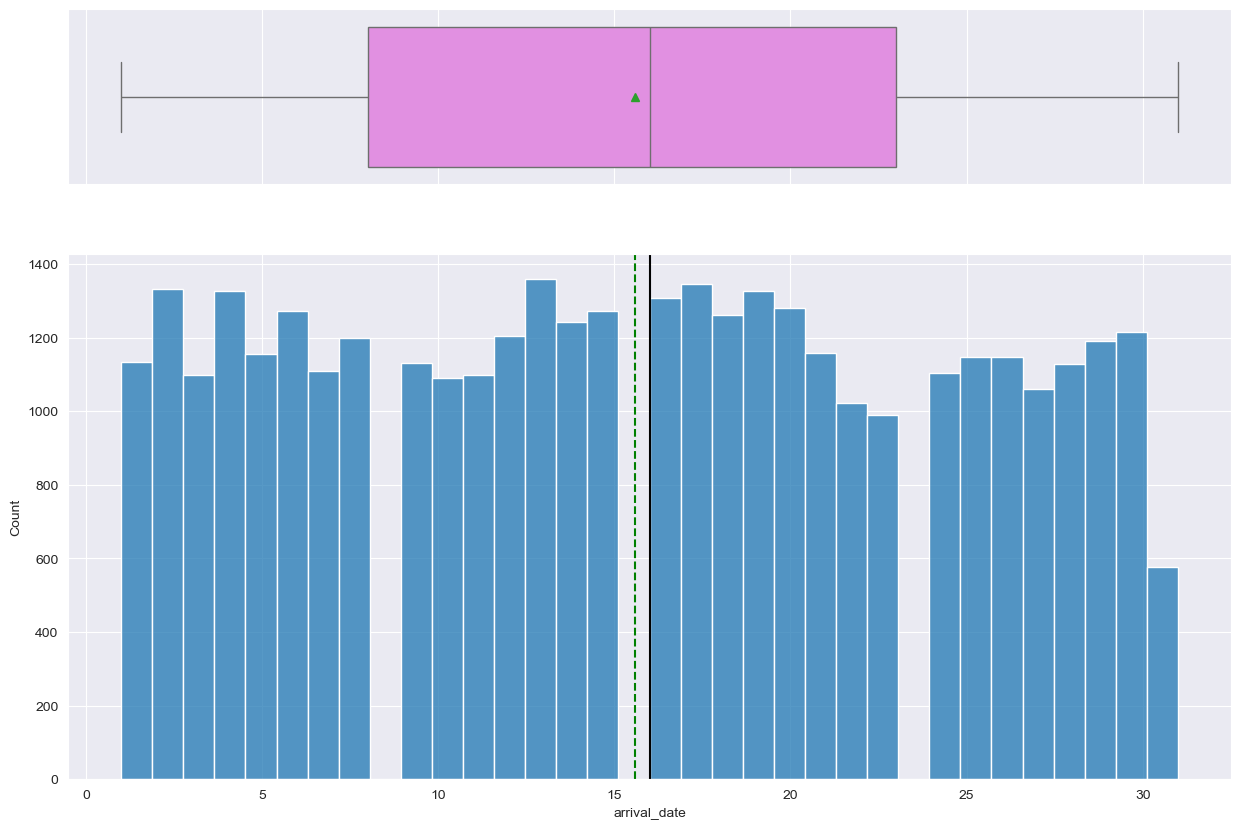

In [46]:
histogram_boxplot(df,"arrival_date")

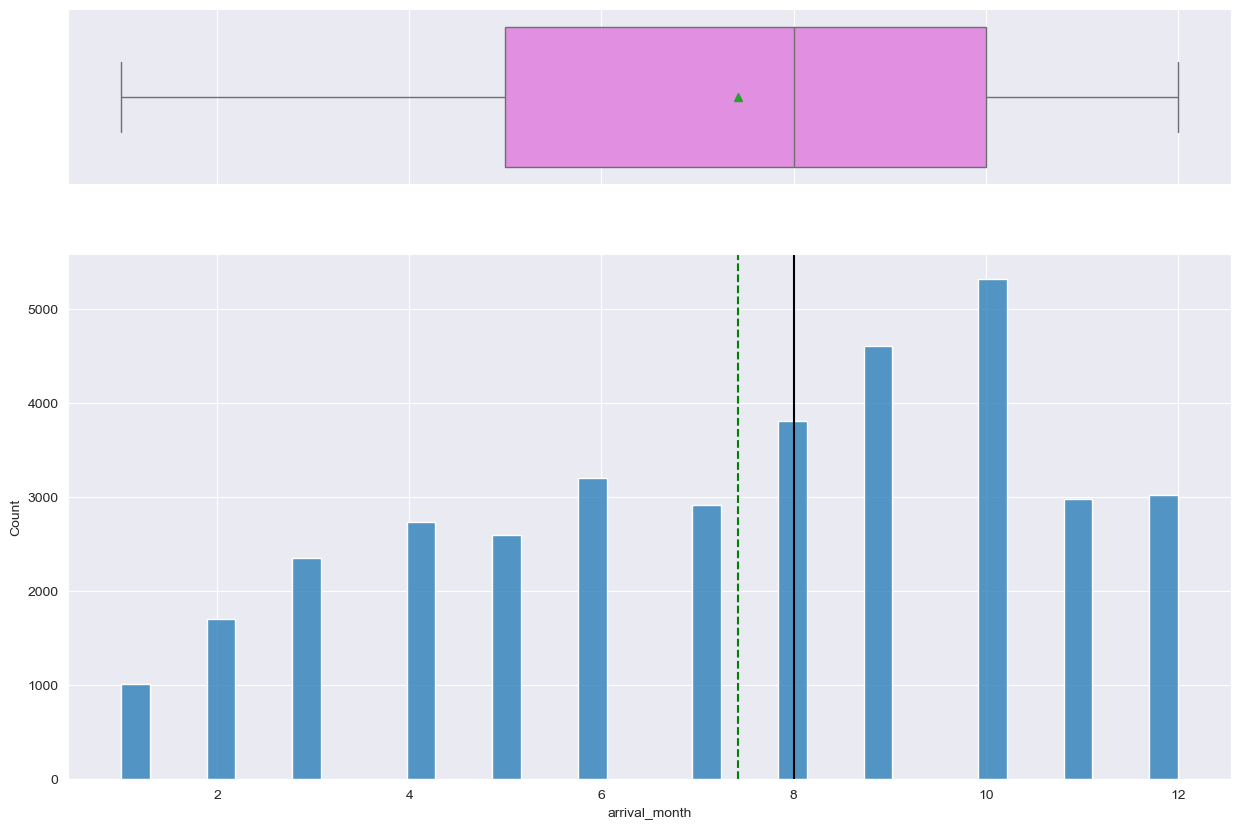

In [47]:
histogram_boxplot(df,"arrival_month")

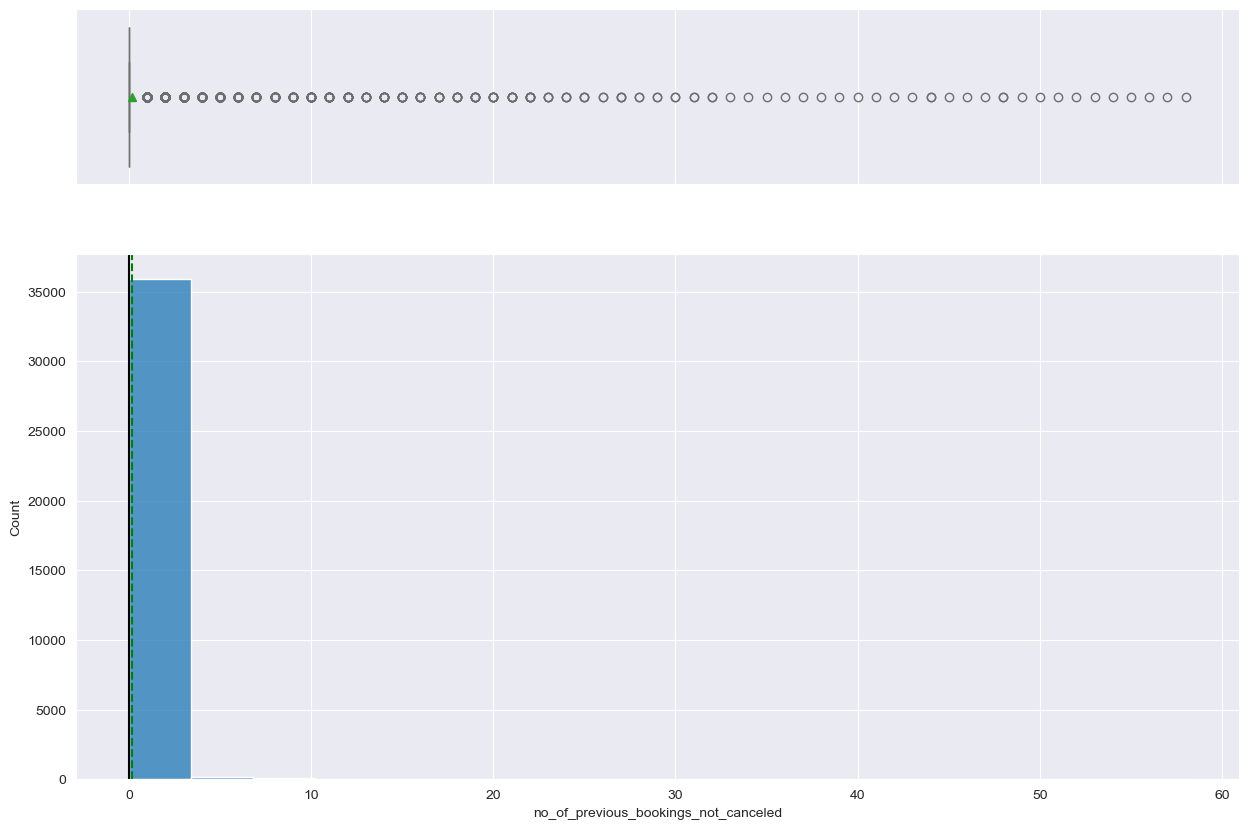

In [48]:
histogram_boxplot(df,"no_of_previous_bookings_not_canceled")

In [49]:
#bivariate analysis

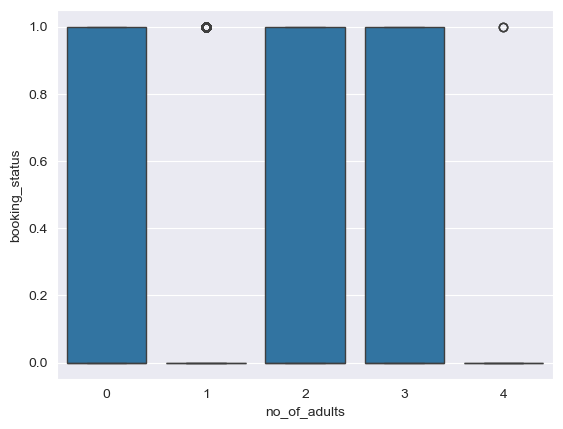

In [50]:
sns.boxplot(data=df,x="no_of_adults",y="booking_status");

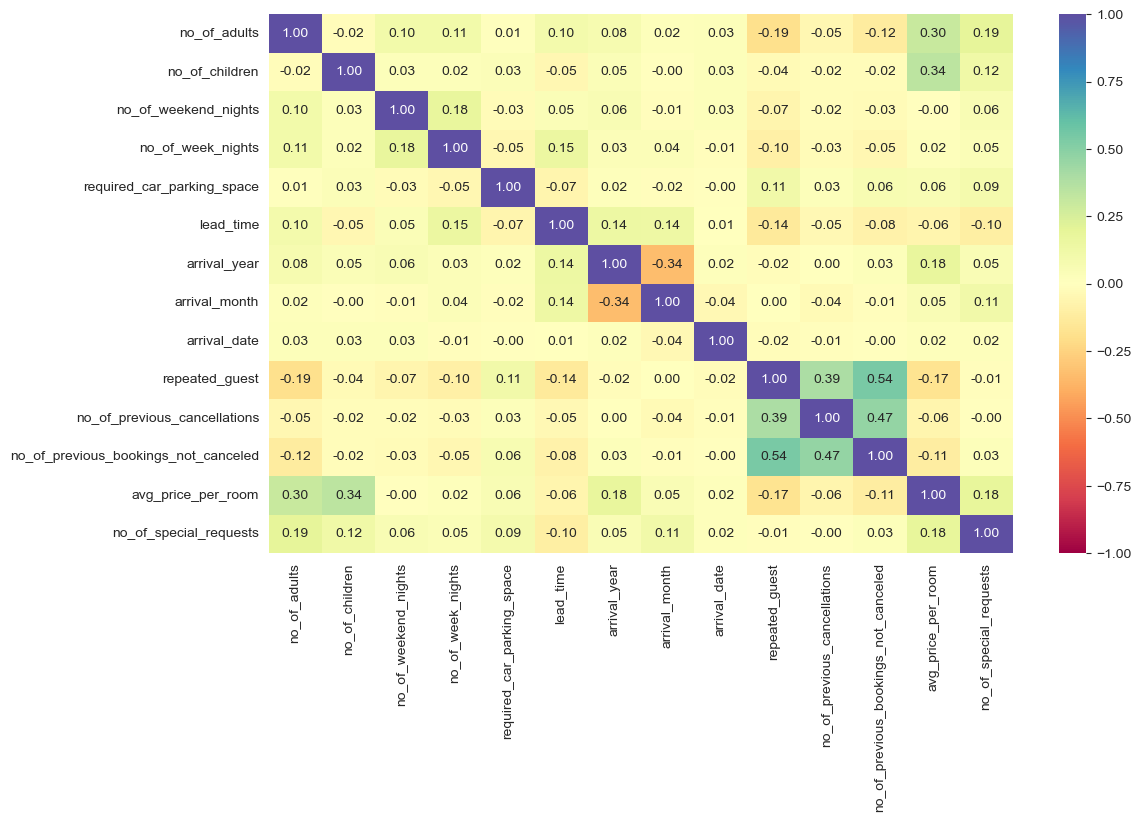

In [51]:
num_cols_list = df.select_dtypes(include=np.number).columns.tolist()
num_cols_list.remove("booking_status")

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [52]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status      0      1    All
no_of_adults                       
All             24390  11885  36275
2               16989   9119  26108
1                5839   1856   7695
3                1454    863   2317
0                  95     44    139
4                  13      3     16
------------------------------------------------------------------------------------------------------------------------


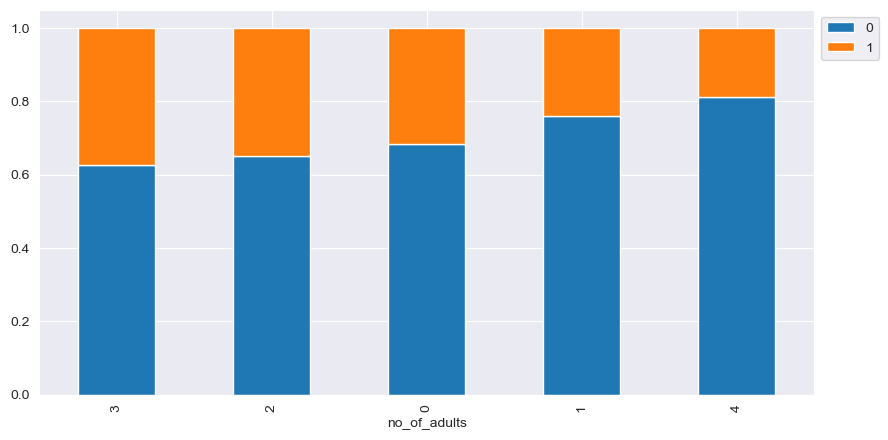

In [53]:
stacked_barplot(df,"no_of_adults","booking_status")

booking_status            0      1    All
no_of_weekend_nights                     
All                   24390  11885  36275
0                     11779   5093  16872
1                      6563   3432   9995
2                      5914   3157   9071
4                        46     83    129
3                        79     74    153
5                         5     29     34
6                         4     16     20
7                         0      1      1
------------------------------------------------------------------------------------------------------------------------


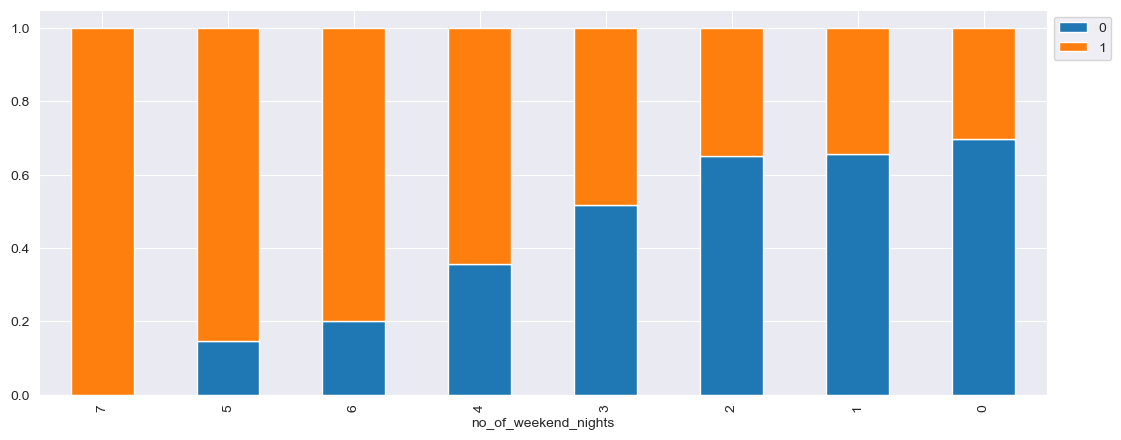

In [54]:
stacked_barplot(df,"no_of_weekend_nights","booking_status")

booking_status         0      1    All
no_of_week_nights                     
All                24390  11885  36275
2                   7447   3997  11444
3                   5265   2574   7839
1                   6916   2572   9488
4                   1847   1143   2990
0                   1708    679   2387
5                    982    632   1614
6                    101     88    189
10                     9     53     62
7                     61     52    113
8                     30     32     62
9                     13     21     34
11                     3     14     17
15                     2      8     10
12                     2      7      9
13                     0      5      5
14                     3      4      7
16                     0      2      2
17                     1      2      3
------------------------------------------------------------------------------------------------------------------------


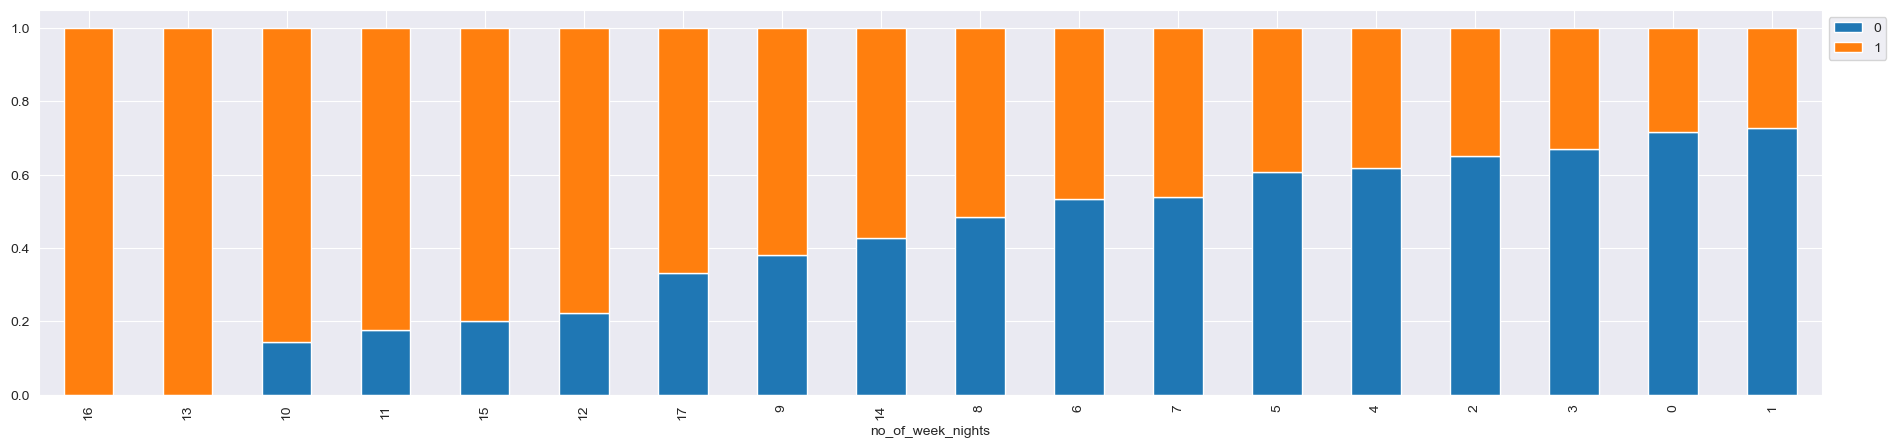

In [90]:
stacked_barplot(df,"no_of_week_nights","booking_status")

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


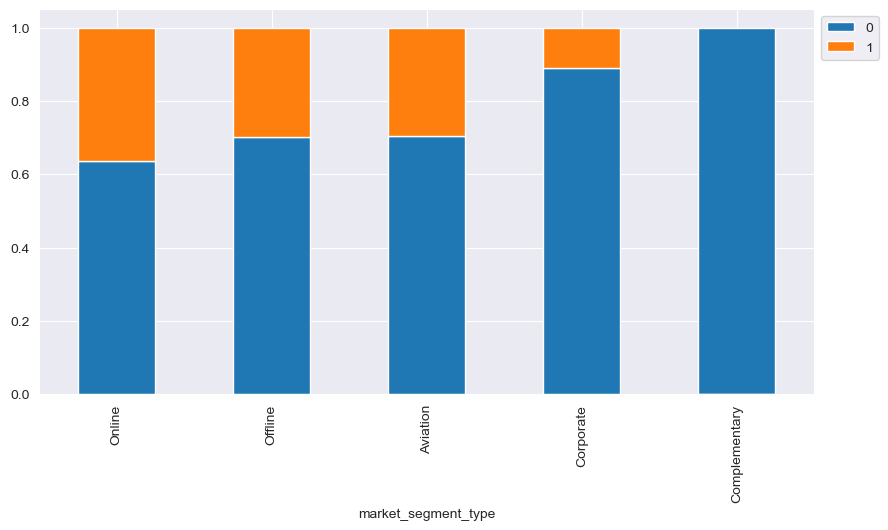

In [91]:
stacked_barplot(df,"market_segment_type","booking_status")

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


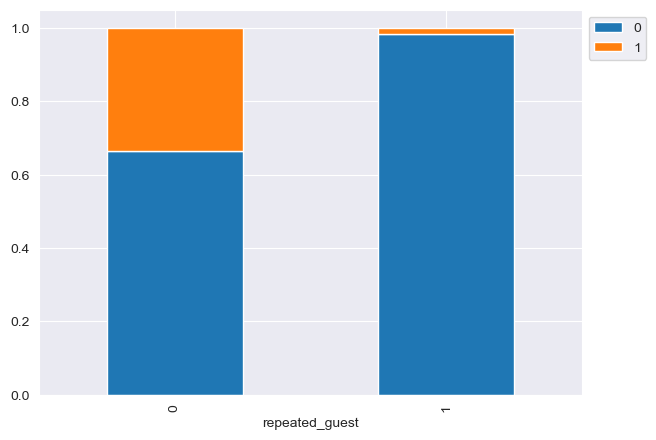

In [93]:
stacked_barplot(df,"repeated_guest","booking_status")

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0               22695  10882  33577
1                1078    540   1618
2                 601    457   1058
3                  14      5     19
9                   1      1      2
10                  1      0      1
------------------------------------------------------------------------------------------------------------------------


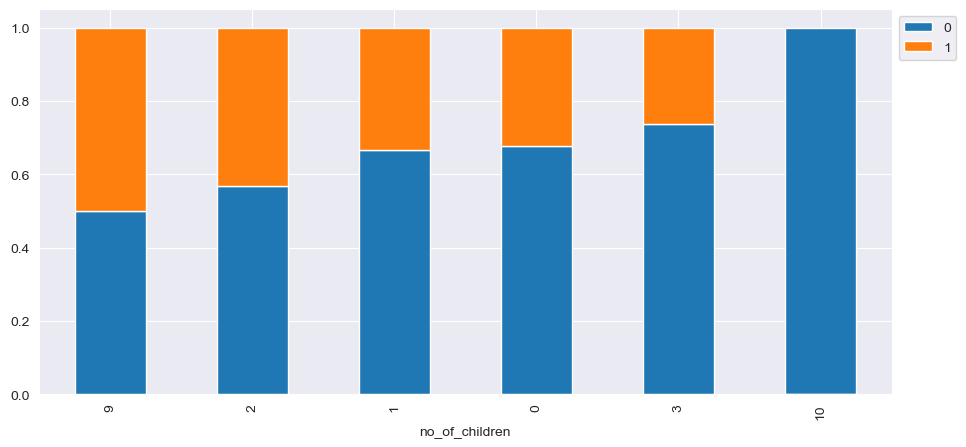

In [95]:
stacked_barplot(df,"no_of_children","booking_status")

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


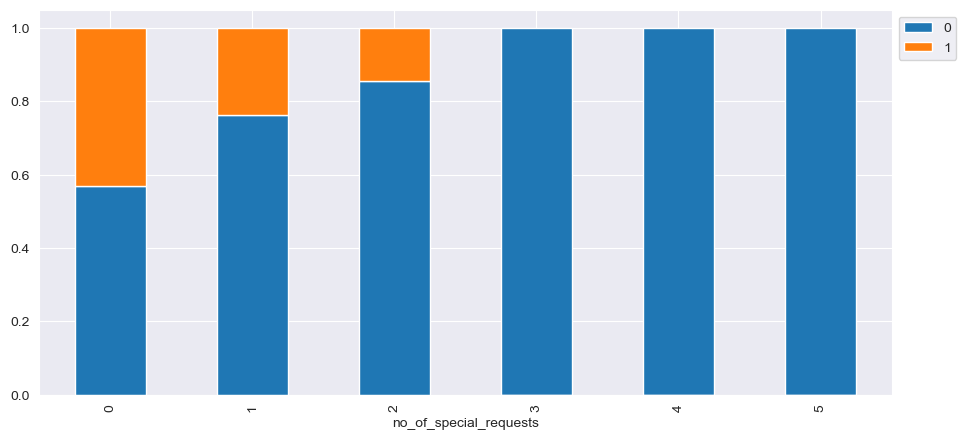

In [97]:
stacked_barplot(df,"no_of_special_requests","booking_status")

booking_status                  0      1    All
required_car_parking_space                     
All                         24390  11885  36275
0                           23380  11771  35151
1                            1010    114   1124
------------------------------------------------------------------------------------------------------------------------


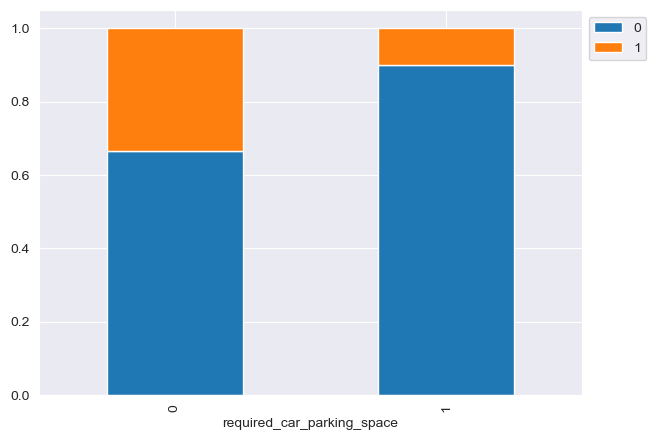

In [99]:
stacked_barplot(df,"required_car_parking_space","booking_status")

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


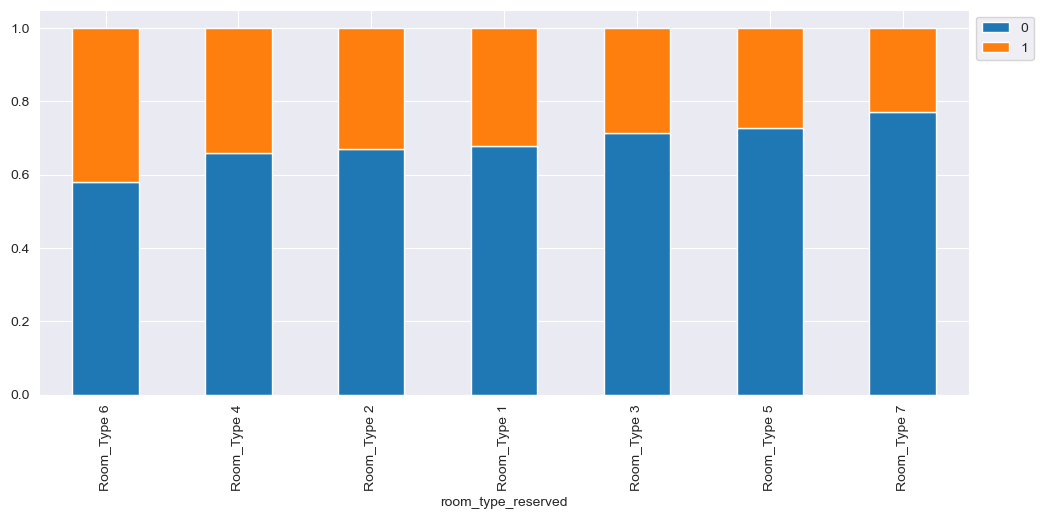

In [101]:
stacked_barplot(df,"room_type_reserved","booking_status")

booking_status      0      1    All
arrival_year                       
All             24390  11885  36275
2018            18837  10924  29761
2017             5553    961   6514
------------------------------------------------------------------------------------------------------------------------


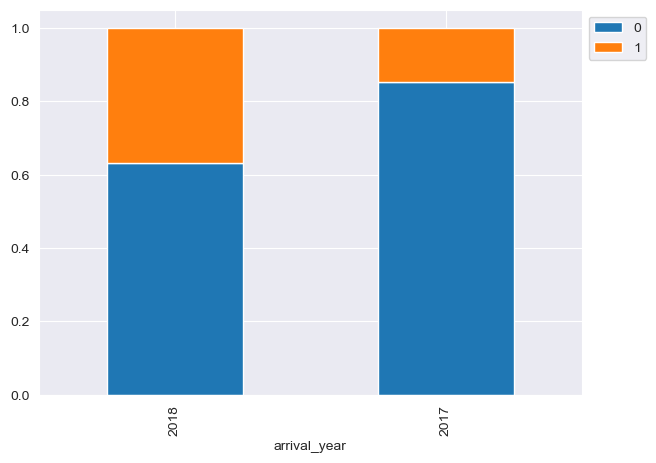

In [103]:
stacked_barplot(df,"arrival_year","booking_status")

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


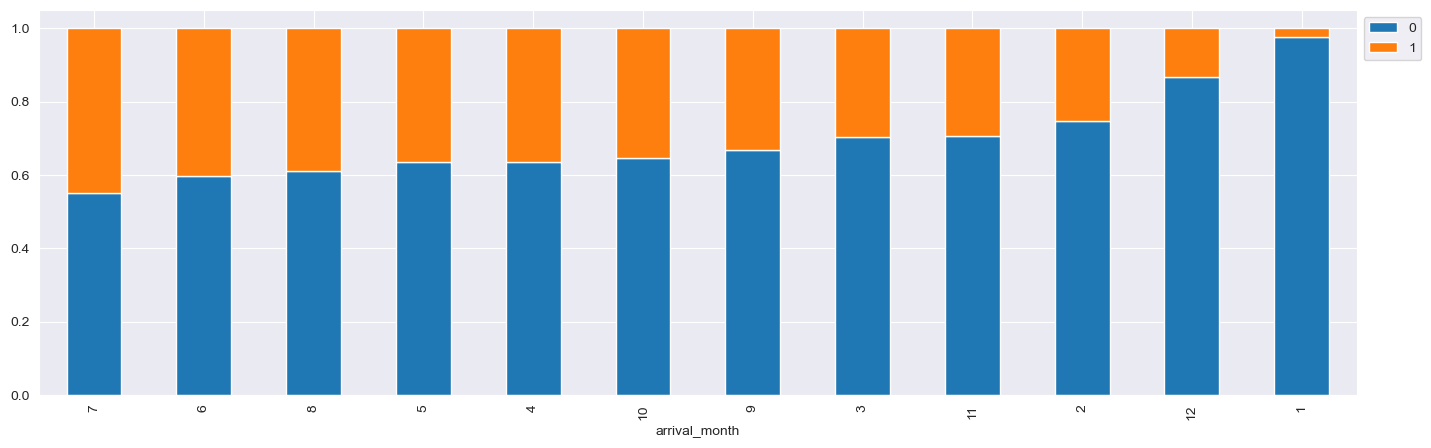

In [92]:
stacked_barplot(df,"arrival_month","booking_status")

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


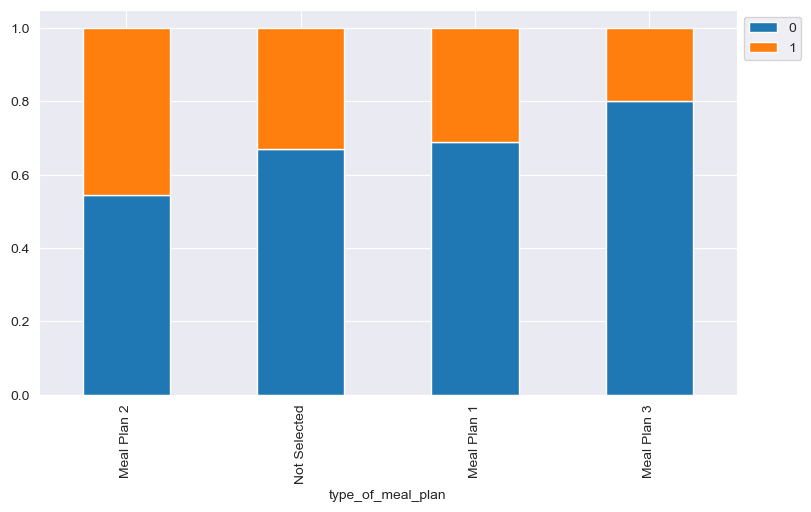

In [94]:
stacked_barplot(df,"type_of_meal_plan","booking_status")

<Axes: xlabel='lead_time'>

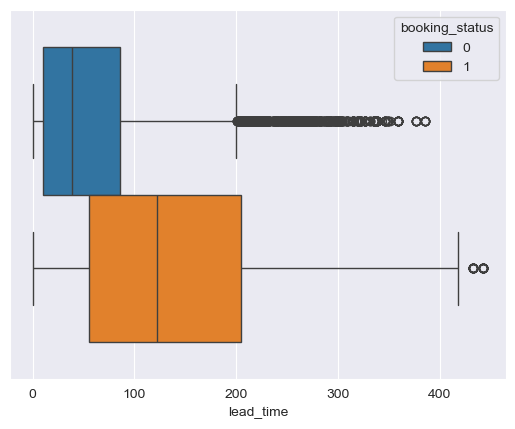

In [96]:
sns.boxplot(data=df,x="lead_time",hue="booking_status")

<Axes: xlabel='arrival_date'>

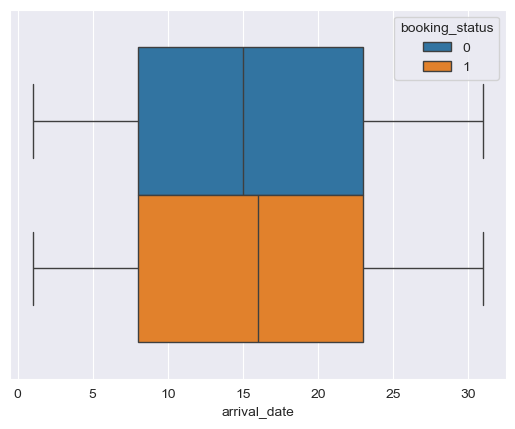

In [98]:
sns.boxplot(data=df,x="arrival_date",hue="booking_status")

In [100]:
distribution_plot_wrt_target(df, "arrival_month", "booking_status")

NameError: name 'distribution_plot_wrt_target' is not defined

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
distribution_plot_wrt_target(df, "arrival_month", "booking_status")

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

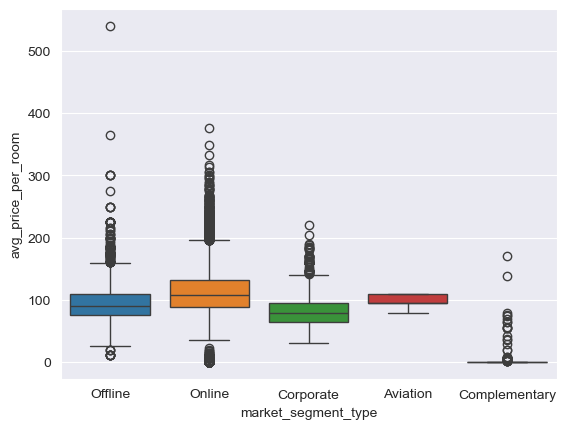

In [105]:
sns.boxplot(df,x="market_segment_type",y="avg_price_per_room",hue="market_segment_type");

In [107]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

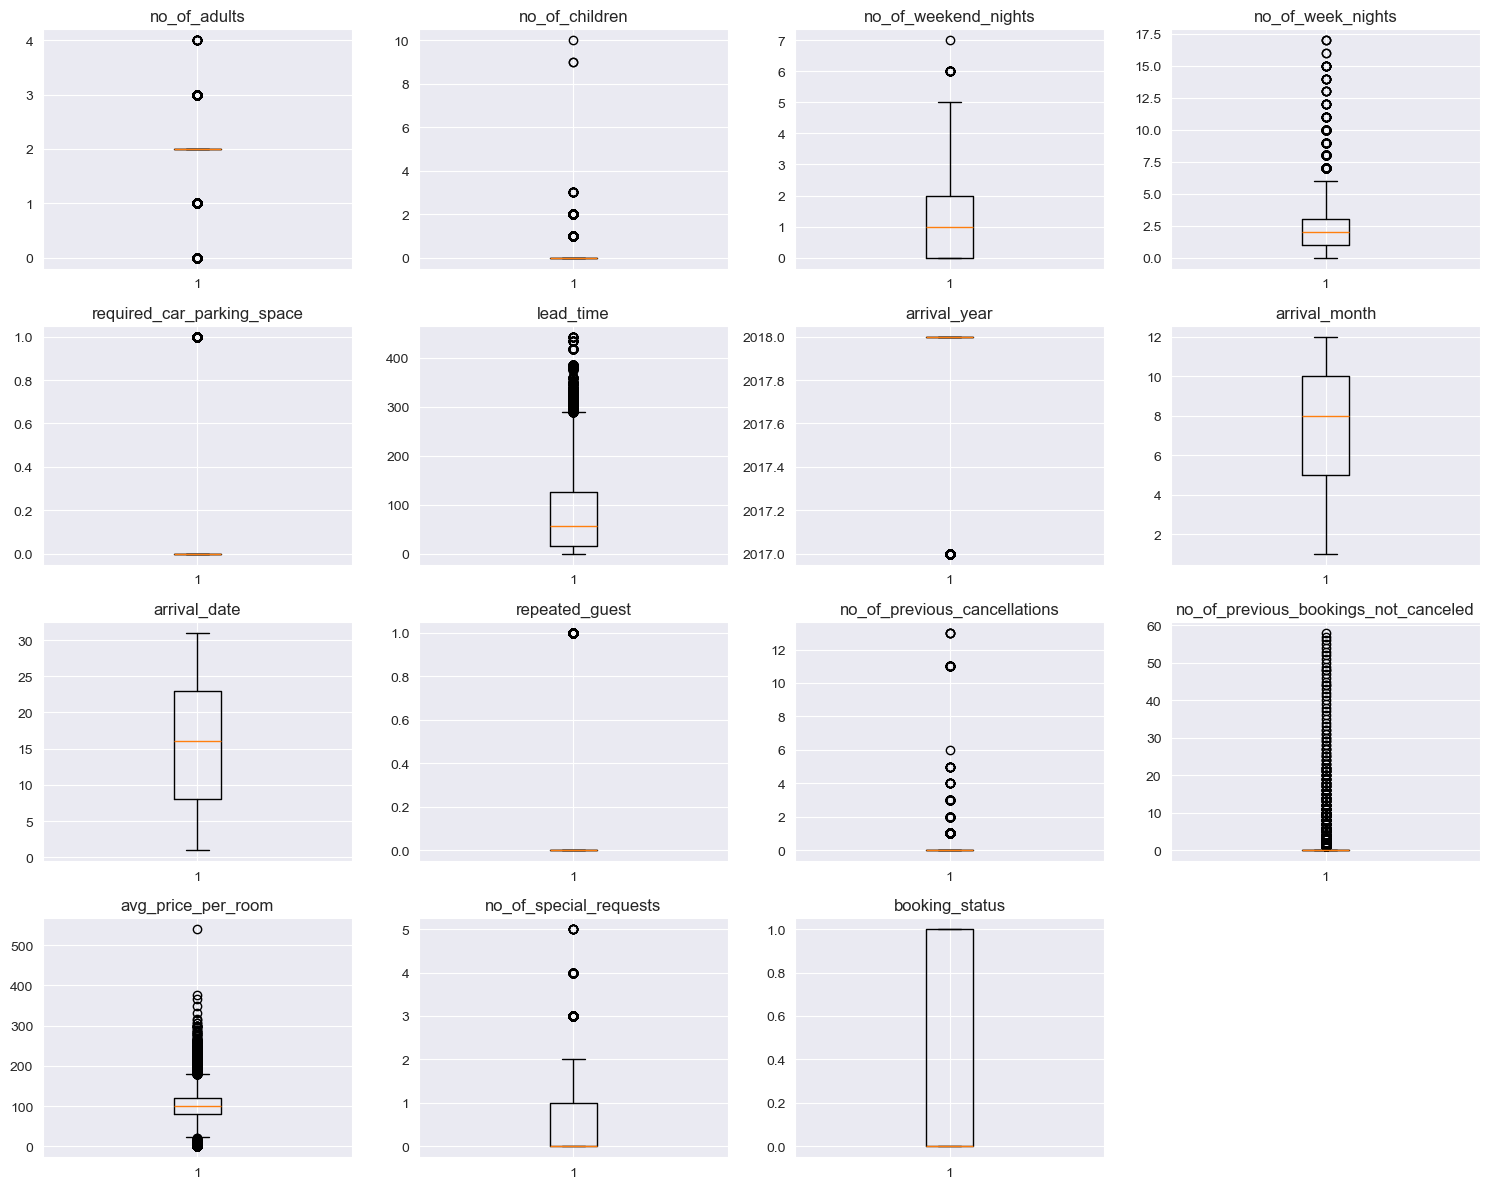

In [109]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [110]:
df.drop(["Booking_ID"],axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


In [111]:
df.drop(["arrival_date"],axis=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,Online,0,0,0,94.50,0,1


In [112]:
dfnew= df.drop(["Booking_ID","arrival_date"],axis=1)

In [113]:
x = dfnew.drop(["booking_status"],axis=1)
y=dfnew["booking_status"]

In [114]:
x=sm.add_constant(x)

In [115]:
x=pd.get_dummies(x,drop_first=True)
x=x.astype(float)

In [116]:
x.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
x.columns

Index(['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [118]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  float64
 2   no_of_children                        36275 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  float64
 4   no_of_week_nights                     36275 non-null  float64
 5   required_car_parking_space            36275 non-null  float64
 6   lead_time                             36275 non-null  float64
 7   arrival_year                          36275 non-null  float64
 8   arrival_month                         36275 non-null  float64
 9   repeated_guest                        36275 non-null  float64
 10  no_of_previous_cancellations          36275 non-null  float64
 11  no_of_previous_

In [119]:
num_cols=['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space','lead_time','arrival_month','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

In [120]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [121]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(x[num_cols])

# Transform selected columns in X using the fitted scaler

x[num_cols] = scaler.transform(x[num_cols])

In [122]:
x.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.298893,-0.26147,0.217401,-0.144803,-0.178819,1.614896,2017.0,0.839242,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.298893,-0.26147,1.365993,0.563972,-0.178819,-0.933701,2018.0,1.164990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,-1.628975,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,2018.0,-1.766747,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,2018.0,-0.789501,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.298893,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,2018.0,-1.115250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [124]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1)

In [139]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


In [141]:
# fitting logistic regression model
x=sm.add_constant(x)
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                  0.3293
Time:                        16:23:51   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.1690    120.826     -7.632      0.000   -1158.983    -685.355
no_of_adults                             0.0590      

C:\Users\ssnan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [142]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [145]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

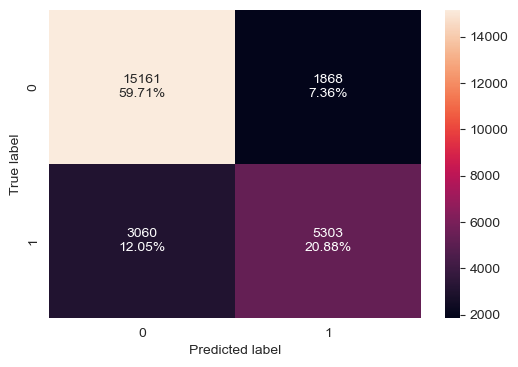

In [147]:
confusion_matrix_statsmodels(lg, x_train, y_train)

In [149]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805923,0.634103,0.739506,0.68276


In [151]:
# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

In [153]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [155]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [157]:
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

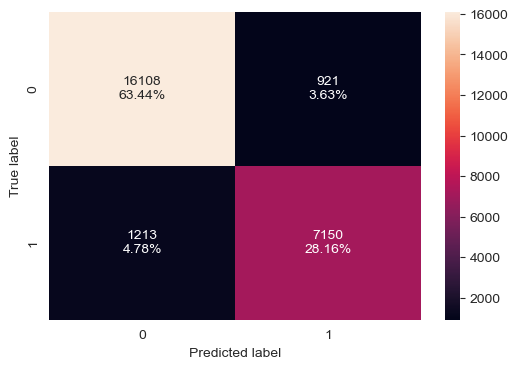

In [159]:
confusion_matrix_sklearn(knn_3, x_train, y_train)

In [160]:
knn_perf_train_3 = model_performance_classification_sklearn(
    knn_3, x_train, y_train
)
knn_perf_train_3

,Accuracy,Recall,Precision,F1
0,0.915958,0.854956,0.885888,0.870147


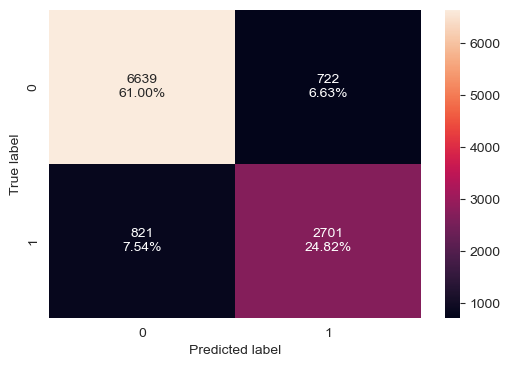

In [161]:
confusion_matrix_sklearn(knn_3, x_test, y_test)

In [162]:
knn_perf_test_3 = model_performance_classification_sklearn(
    knn_3, x_test, y_test
)
knn_perf_test_3

,Accuracy,Recall,Precision,F1
0,0.858219,0.766894,0.789074,0.777826


In [163]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

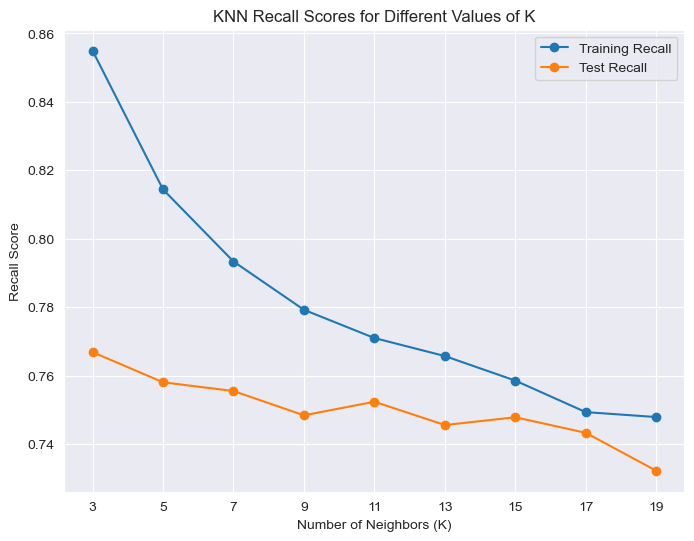

In [165]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

In [166]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

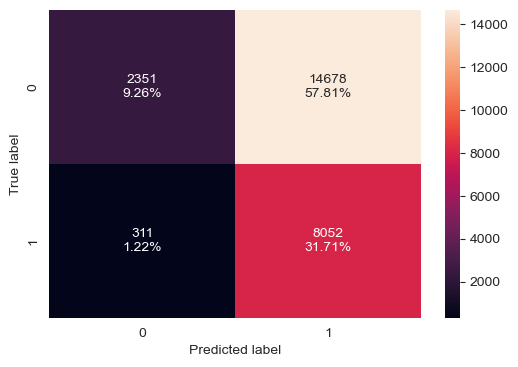

In [167]:
confusion_matrix_sklearn(nb, x_train, y_train)

In [168]:
nb_perf_train = model_performance_classification_sklearn(
    nb, x_train, y_train
)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.409696,0.962812,0.354245,0.51793


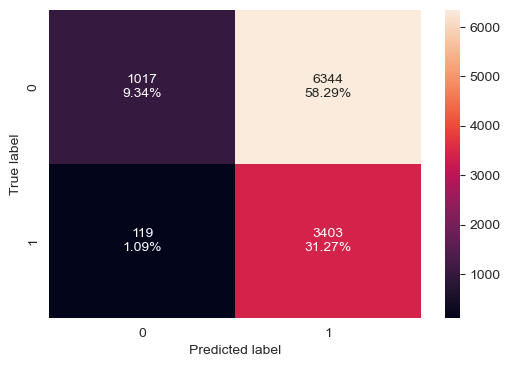

In [169]:
confusion_matrix_sklearn(nb, x_test, y_test)

In [170]:
nb_perf_test = model_performance_classification_sklearn(
    nb, x_test, y_test
)
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.406138,0.966212,0.349133,0.512925


In [171]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        knn_perf_train_3.T,
        nb_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,K Nearest Neighbor k=3,Naive Bayes
Accuracy,0.915958,0.409696
Recall,0.854956,0.962812
Precision,0.885888,0.354245
F1,0.870147,0.517930


In [172]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        knn_perf_test_3.T,
        nb_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,K Nearest Neighbor k=3,Naive Bayes
Accuracy,0.858219,0.406138
Recall,0.766894,0.966212
Precision,0.789074,0.349133
F1,0.777826,0.512925


In [174]:
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

In [175]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [176]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
     # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [177]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


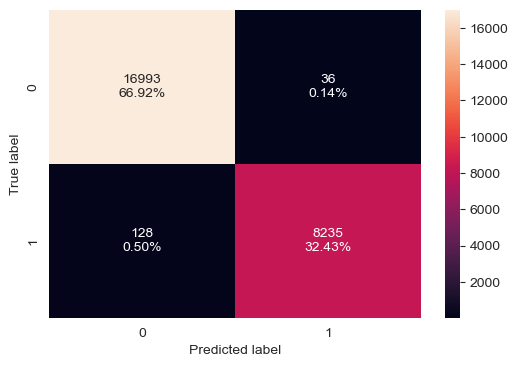

In [178]:
confusion_matrix_sklearn(model0, x_train, y_train)

In [179]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, x_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.993541,0.984694,0.995647,0.990141


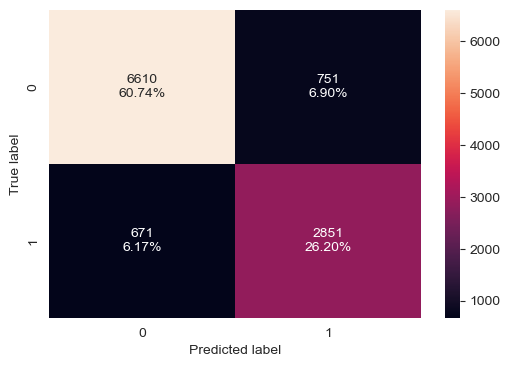

In [181]:
confusion_matrix_sklearn(model0, x_test, y_test)

In [182]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, x_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.869337,0.809483,0.791505,0.800393


In [183]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

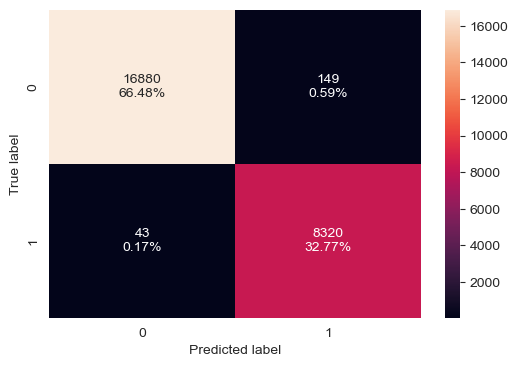

In [184]:
confusion_matrix_sklearn(model, x_train, y_train)

In [185]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, x_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.992439,0.994858,0.982406,0.988593


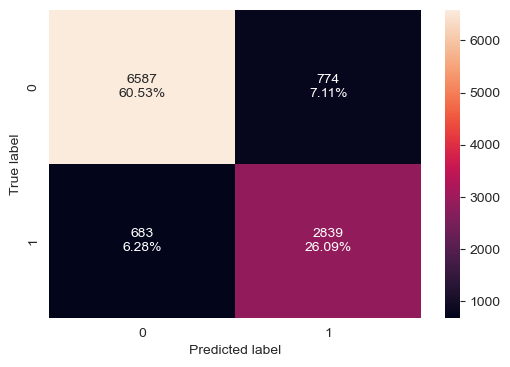

In [187]:
confusion_matrix_sklearn(model, x_test, y_test)

In [188]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, x_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.866121,0.806076,0.785774,0.795795


In [189]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": [4],
    "min_samples_split": [100],
    "min_samples_leaf":[50],
    "max_leaf_nodes":[15]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=15,
                       min_samples_leaf=50, min_samples_split=100,
                       random_state=1)

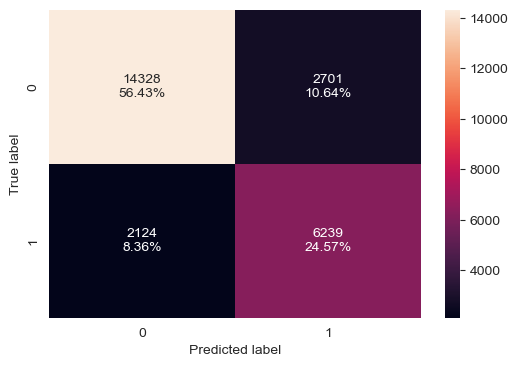

In [190]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [191]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.80998,0.746024,0.697875,0.721147


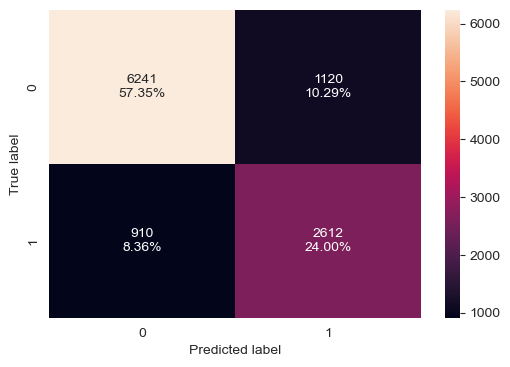

In [192]:
confusion_matrix_sklearn(estimator, x_test, y_test)

In [193]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.813471,0.741624,0.699893,0.720154


In [194]:
feature_names = list(x_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

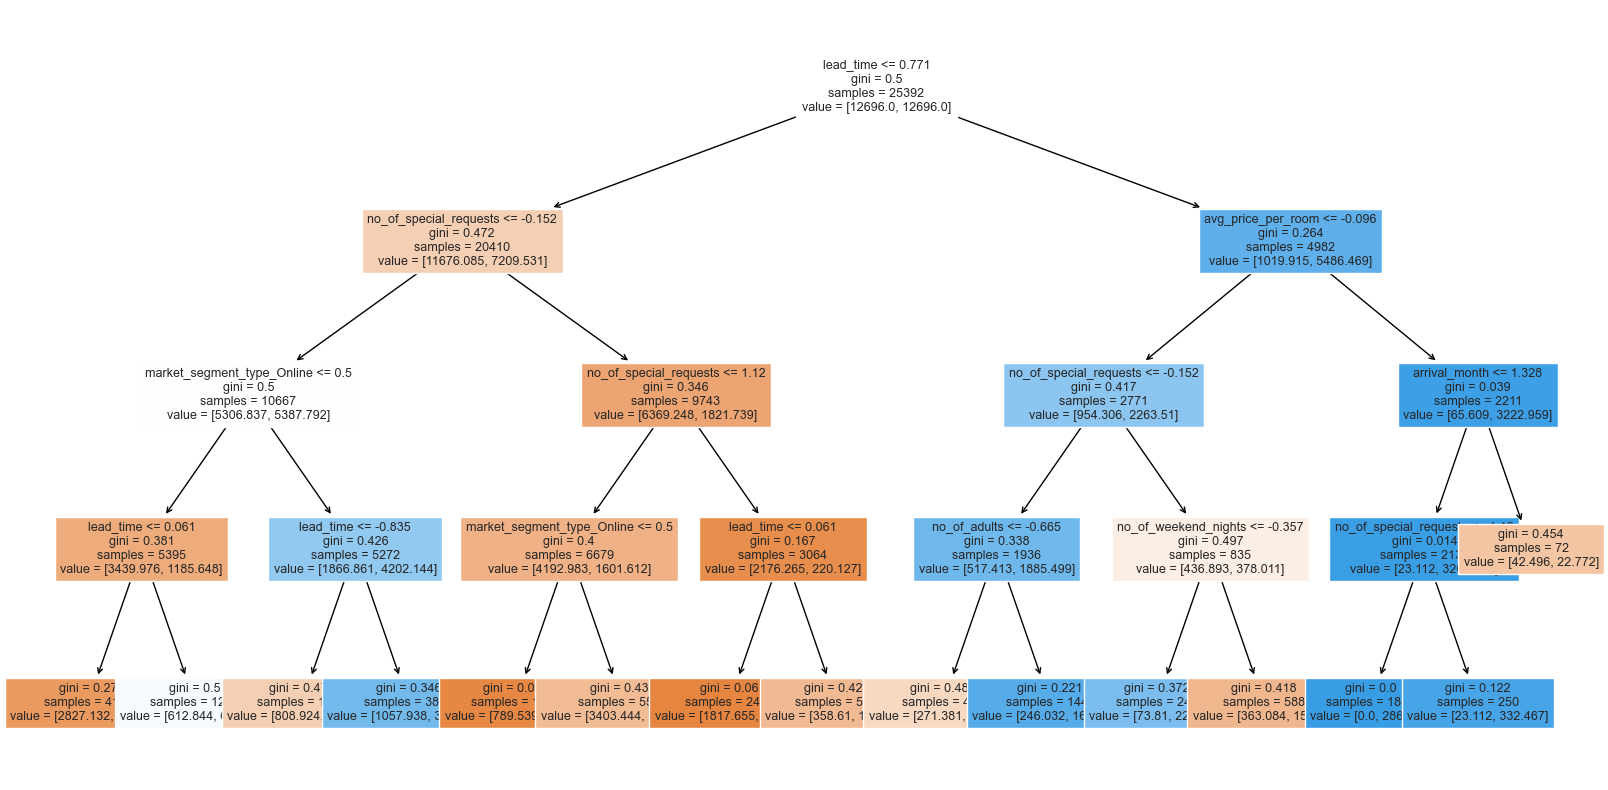

In [195]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [196]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 0.77
|   |--- no_of_special_requests <= -0.15
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 0.06
|   |   |   |   |--- weights: [2827.13, 541.97] class: 0
|   |   |   |--- lead_time >  0.06
|   |   |   |   |--- weights: [612.84, 643.68] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= -0.83
|   |   |   |   |--- weights: [808.92, 497.94] class: 0
|   |   |   |--- lead_time >  -0.83
|   |   |   |   |--- weights: [1057.94, 3704.20] class: 1
|   |--- no_of_special_requests >  -0.15
|   |   |--- no_of_special_requests <= 1.12
|   |   |   |--- market_segment_type_Online <= 0.50
|   |   |   |   |--- weights: [789.54, 40.99] class: 0
|   |   |   |--- market_segment_type_Online >  0.50
|   |   |   |   |--- weights: [3403.44, 1560.62] class: 0
|   |   |--- no_of_special_requests >  1.12
|   |   |   |--- lead_time <= 0.06
|   |   |   |   |--- weights: [1817.66, 57.69] class: 0
|   |   |   |--- lead_time >  0.06

In [197]:
importances = estimator.feature_importances_
importances

array([0.        , 0.03041237, 0.        , 0.01485169, 0.        ,
       0.        , 0.50538815, 0.        , 0.01002451, 0.        ,
       0.        , 0.        , 0.04703016, 0.1847714 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20752172])

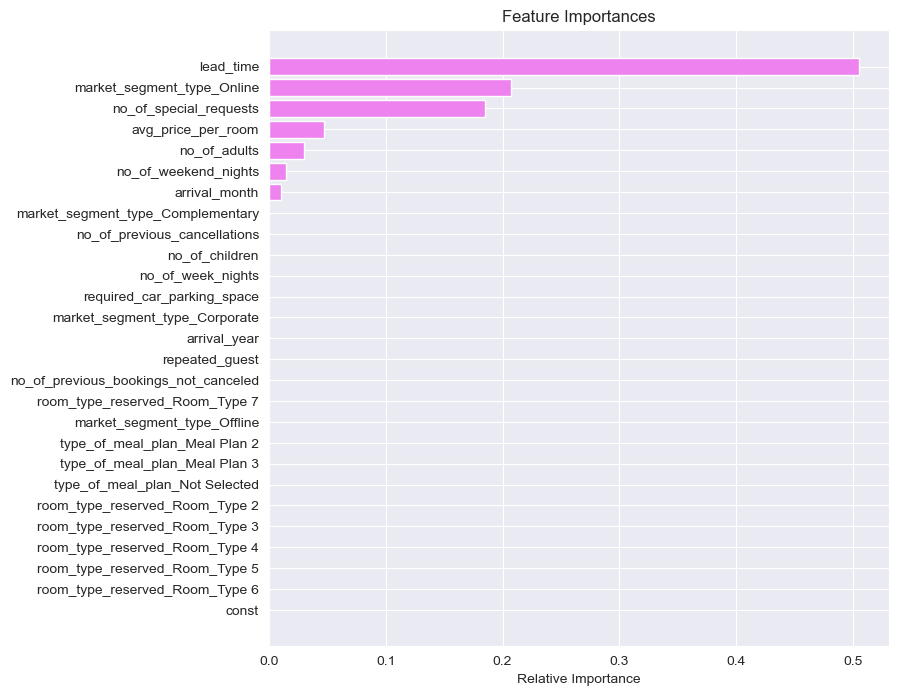

In [198]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [199]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [200]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.009130
1,-2.710505e-20,0.009130
2,2.933821e-20,0.009130
3,2.933821e-20,0.009130
4,2.933821e-20,0.009130
...,...,...
1926,8.901596e-03,0.328058
1927,9.802243e-03,0.337860
1928,1.271875e-02,0.350579
1929,3.412090e-02,0.418821


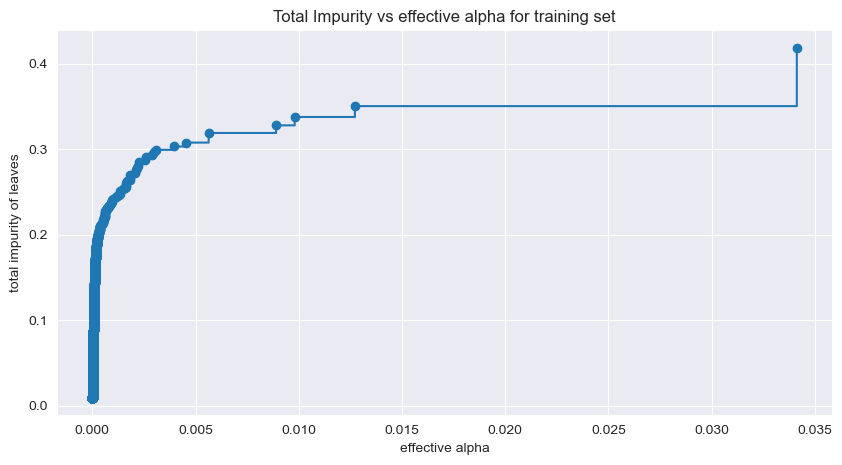

In [201]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [202]:
ccp_alphas = ccp_alphas[::20]  # Take every 10th value

In [203]:
# Define your hyperparameters
ccp_alphas = [0.001, 0.01, 0.1]  # Different values of ccp_alpha for pruning
max_depth = 5  # Restrict tree depth to prevent overfitting
min_samples_split = 10  # Require more samples to split a node
min_samples_leaf = 5  # Require more samples to form a leaf node
max_features = "sqrt"  # Limit features considered at each split

# List to store the trained classifiers
clfs = []

# Train decision trees with different values of ccp_alpha
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, 
        ccp_alpha=ccp_alpha, 
        class_weight="balanced", 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        max_features=max_features
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)

# Print the number of nodes in the last tree and the corresponding ccp_alpha
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.1


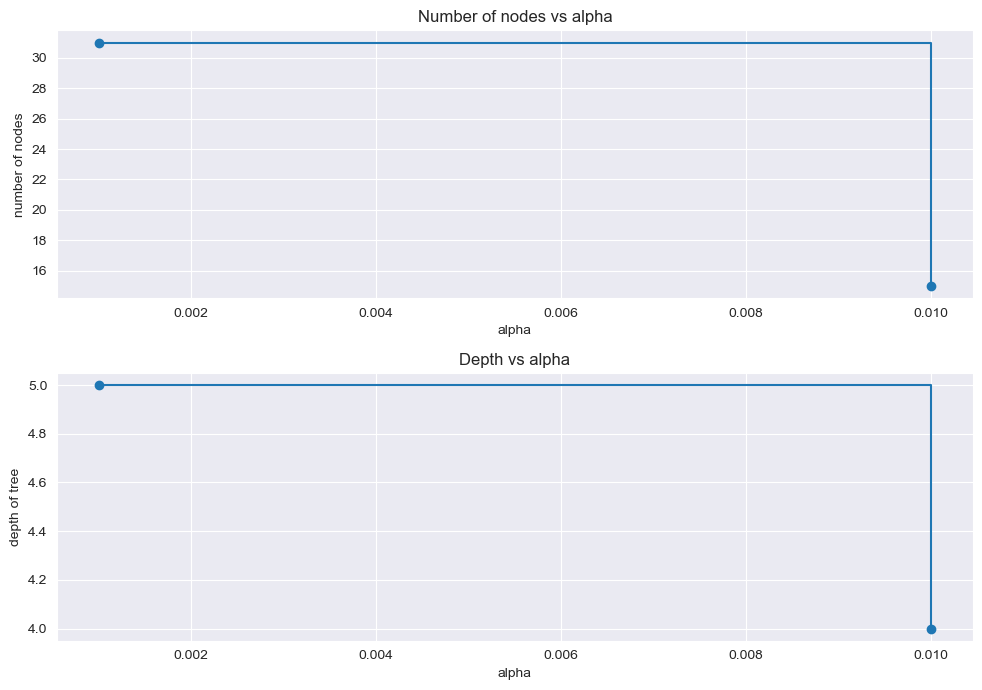

In [204]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [205]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [206]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [207]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

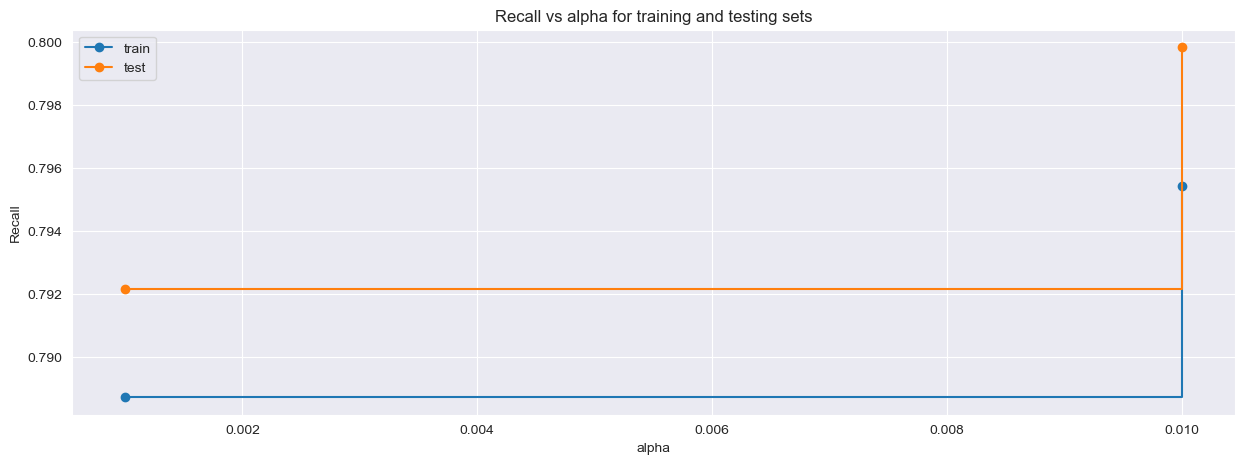

In [208]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [209]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=1)


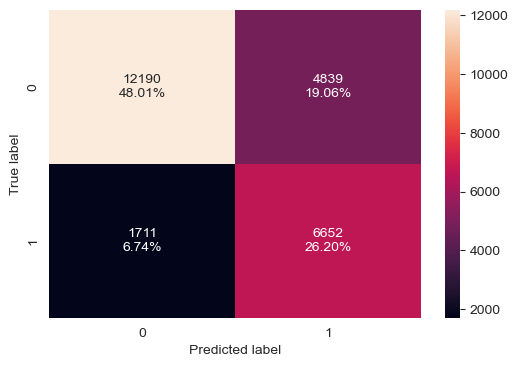

In [210]:
confusion_matrix_sklearn(best_model, x_train, y_train)

In [211]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.742045,0.795408,0.578888,0.670092


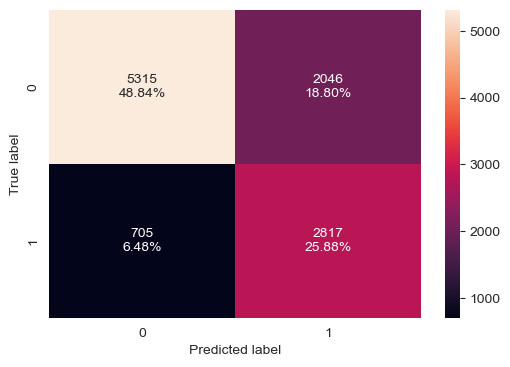

In [212]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [213]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.74722,0.79983,0.579272,0.671914


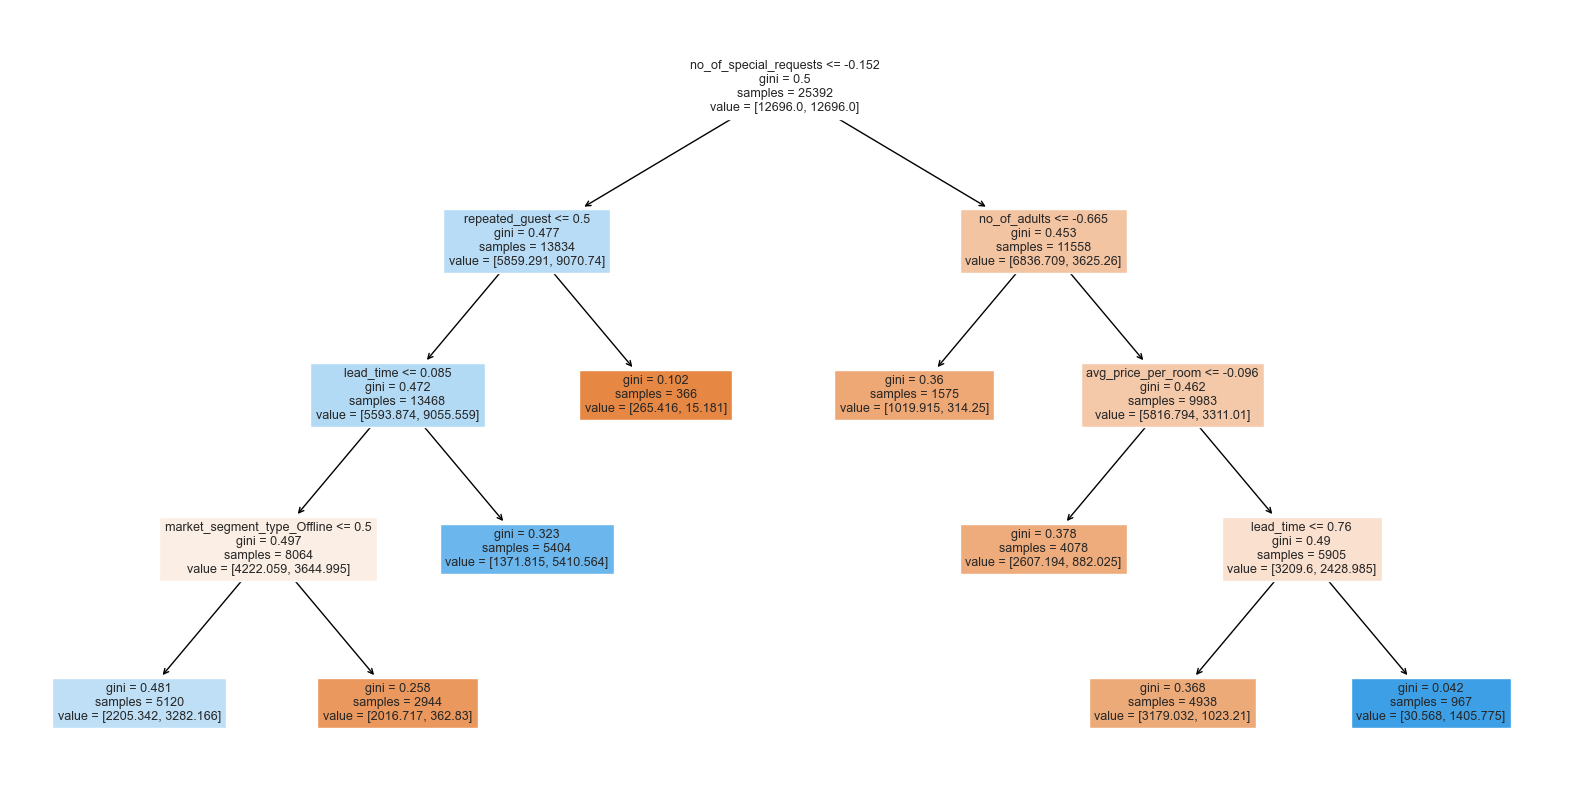

In [214]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [215]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- no_of_special_requests <= -0.15
|   |--- repeated_guest <= 0.50
|   |   |--- lead_time <= 0.08
|   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |--- weights: [2205.34, 3282.17] class: 1
|   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |--- weights: [2016.72, 362.83] class: 0
|   |   |--- lead_time >  0.08
|   |   |   |--- weights: [1371.82, 5410.56] class: 1
|   |--- repeated_guest >  0.50
|   |   |--- weights: [265.42, 15.18] class: 0
|--- no_of_special_requests >  -0.15
|   |--- no_of_adults <= -0.67
|   |   |--- weights: [1019.91, 314.25] class: 0
|   |--- no_of_adults >  -0.67
|   |   |--- avg_price_per_room <= -0.10
|   |   |   |--- weights: [2607.19, 882.03] class: 0
|   |   |--- avg_price_per_room >  -0.10
|   |   |   |--- lead_time <= 0.76
|   |   |   |   |--- weights: [3179.03, 1023.21] class: 0
|   |   |   |--- lead_time >  0.76
|   |   |   |   |--- weights: [30.57, 1405.77] class: 1



In [216]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

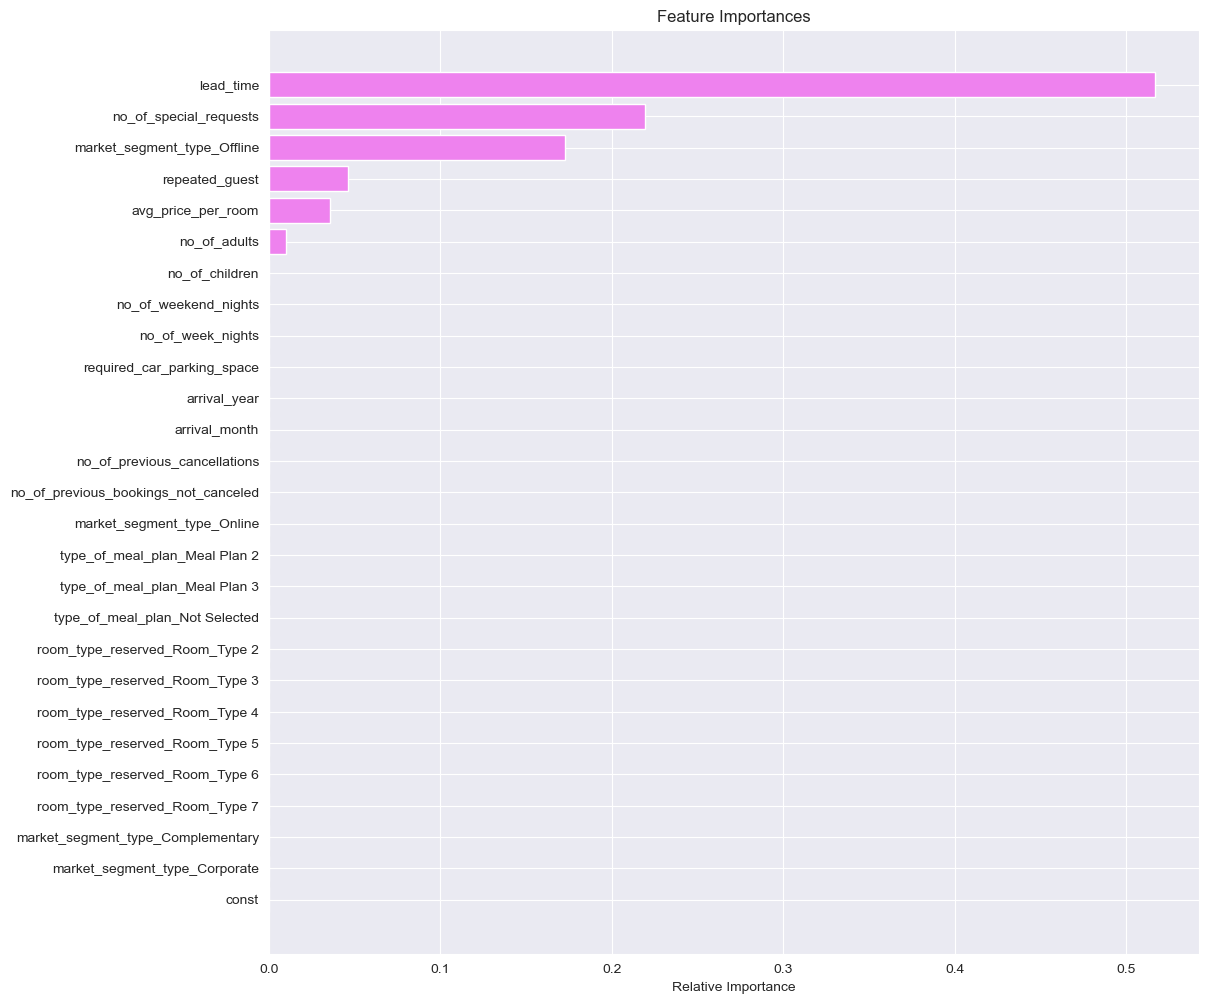

In [217]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [218]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.993541,0.992439,0.809980,0.742045
Recall,0.984694,0.994858,0.746024,0.795408
Precision,0.995647,0.982406,0.697875,0.578888
F1,0.990141,0.988593,0.721147,0.670092


In [219]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.869337,0.866121,0.813471,0.747220
Recall,0.809483,0.806076,0.741624,0.799830
Precision,0.791505,0.785774,0.699893,0.579272
F1,0.800393,0.795795,0.720154,0.671914


In [ ]:
# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [372]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.946964e+07
no_of_adults                            1.347792e+00
no_of_children                          1.977908e+00
no_of_weekend_nights                    1.068646e+00
no_of_week_nights                       1.095378e+00
required_car_parking_space              1.039885e+00
lead_time                               1.394487e+00
arrival_year                            1.430815e+00
arrival_month                           1.273407e+00
repeated_guest                          1.783130e+00
no_of_previous_cancellations            1.395617e+00
no_of_previous_bookings_not_canceled    1.651952e+00
avg_price_per_room                      2.050408e+00
no_of_special_requests                  1.246956e+00
type_of_meal_plan_Meal Plan 2           1.271093e+00
type_of_meal_plan_Meal Plan 3           1.025199e+00
type_of_meal_plan_Not Selected          1.272070e+00
room_type_reserved_Room_Type 2          1.101179e+00
room_type_r

In [401]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [403]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39469641.13
no_of_adults                                  1.35
no_of_children                                1.98
no_of_weekend_nights                          1.07
no_of_week_nights                             1.10
required_car_parking_space                    1.04
lead_time                                     1.39
arrival_year                                  1.43
arrival_month                                 1.27
repeated_guest                                1.78
no_of_previous_cancellations                  1.40
no_of_previous_bookings_not_canceled          1.65
avg_price_per_room                            2.05
no_of_special_requests                        1.25
type_of_meal_plan_Meal Plan 2                 1.27
type_of_meal_plan_Meal Plan 3                 1.03
type_of_meal_plan_Not Selected                1.27
room_type_reserved_Room_Type 2                1.10
room_type_reserved_Room_Type 3                1

In [405]:
x_train1 = x_train.drop("market_segment_type_Online", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39392608.95
no_of_adults                                  1.33
no_of_children                                1.98
no_of_weekend_nights                          1.07
no_of_week_nights                             1.09
required_car_parking_space                    1.04
lead_time                                     1.39
arrival_year                                  1.43
arrival_month                                 1.27
repeated_guest                                1.78
no_of_previous_cancellations                  1.40
no_of_previous_bookings_not_canceled          1.65
avg_price_per_room                            2.05
no_of_special_requests                        1.24
type_of_meal_plan_Meal Plan 2                 1.27
type_of_meal_plan_Meal Plan 3                 1.03
type_of_meal_plan_Not Selected                1.27
room_type_reserved_Room_Type 2                1.10
room_type_reserved_Room_Type 3                1

In [407]:
logit2 = sm.Logit(y_train, x_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, x_train1, y_train)

Training performance:


C:\Users\ssnan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Accuracy,Recall,Precision,F1
0,0.81,0.63,0.74,0.68


In [409]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.3292
Time:                        15:34:54   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -930.9305    120.663     -7.715      0.000   -1167.427    -694.435
no_of_adults                             0.0551      

In [411]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

C:\Users\ssnan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [413]:
x_train2 = x_train1[selected_features]

In [415]:
logit3 = sm.Logit(y_train, x_train2.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.3283
Time:                        15:38:28   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -914.8378    120.459     -7.595      0.000   -1150.933    -678.743
no_of_adults                       0.0563      0.019      2.914      0.

In [417]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00,1.06,1.06,1.10,1.06,0.76,3.86,1.57,0.88,0.06,1.09,1.96,0.31,1.18,1.33,0.70,0.75,0.48,0.38,0.24,0.45,0.17
Change_odd%,-100.00,5.80,6.32,9.92,6.07,-24.14,285.76,57.32,-12.19,-93.52,8.79,95.90,-68.52,17.99,33.09,-29.95,-24.62,-52.06,-61.90,-76.10,-54.74,-83.25


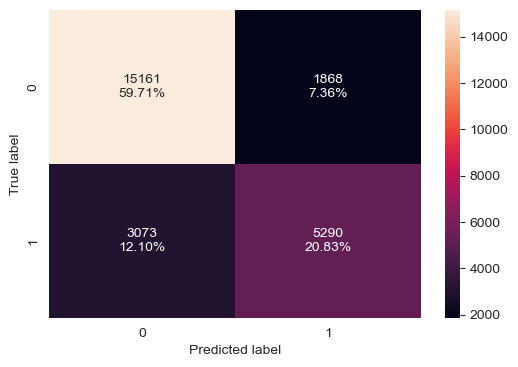

In [419]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train2, y_train)

In [421]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, x_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.81,0.63,0.74,0.68


In [423]:
x_test2 = x_test[list(x_train2.columns)]

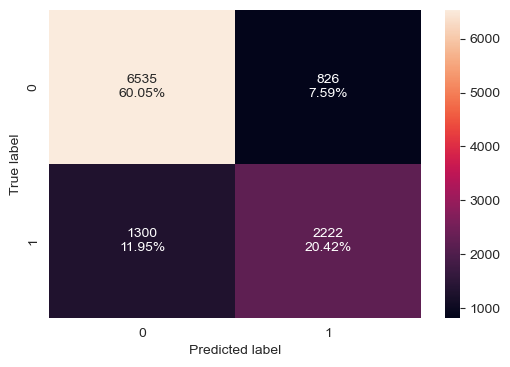

In [425]:
confusion_matrix_statsmodels(lg3, x_test2, y_test)

In [427]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, x_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80,0.63,0.73,0.68


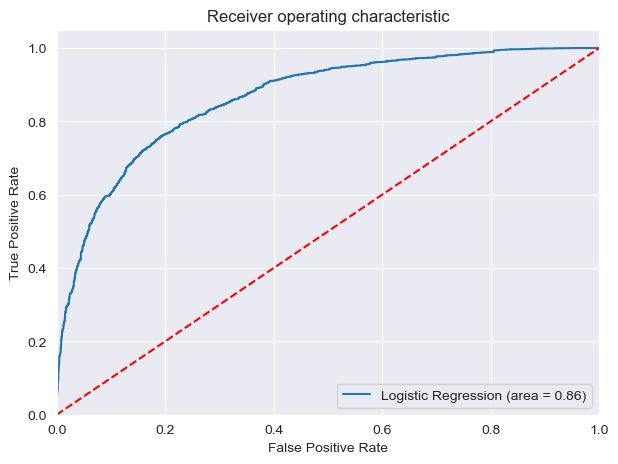

In [429]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(x_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [435]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234889316


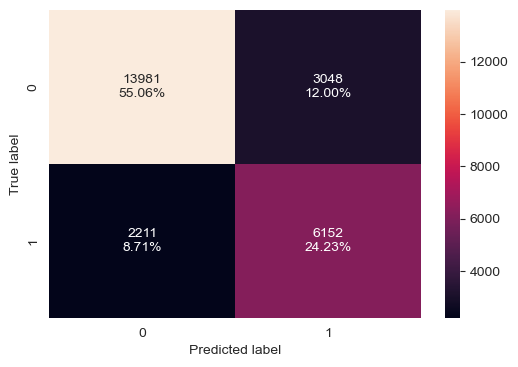

In [439]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_auc_roc)

In [441]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79,0.74,0.67,0.70


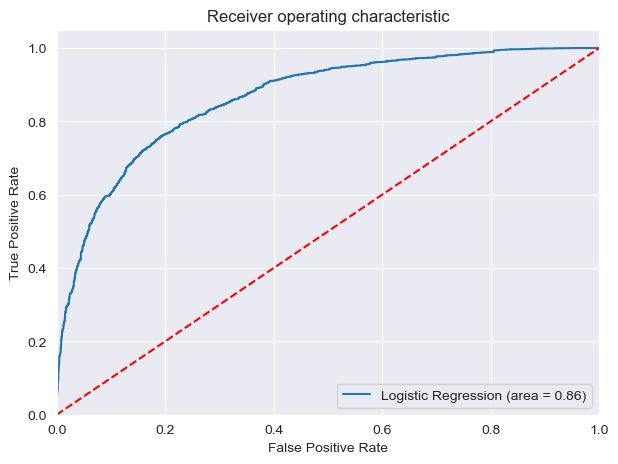

In [443]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(x_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

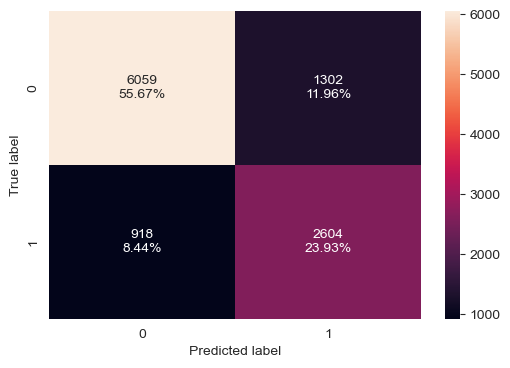

In [445]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test2, y_test, threshold=optimal_threshold_auc_roc)

In [447]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80,0.74,0.67,0.70


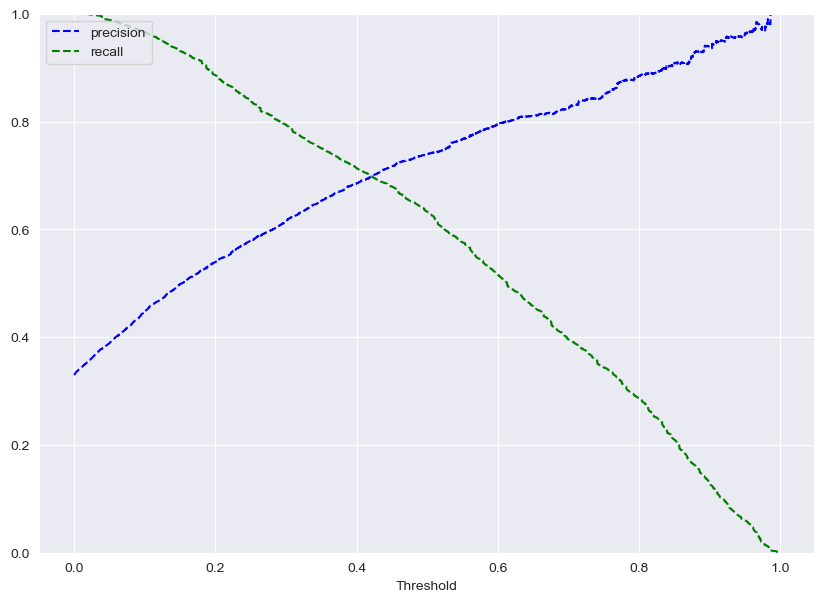

In [449]:
y_scores = lg3.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [451]:
#setting the optimal threshold
optimal_threshold_curve=0.42

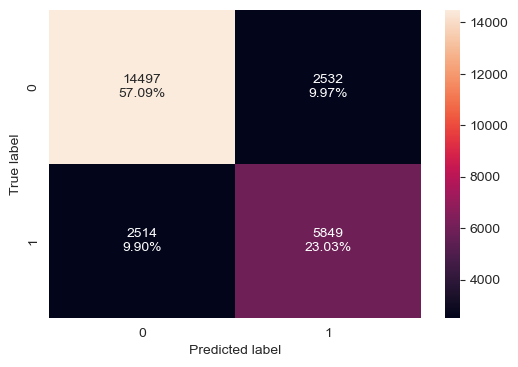

In [453]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train2, y_train, threshold=optimal_threshold_curve)

In [455]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80,0.70,0.70,0.70


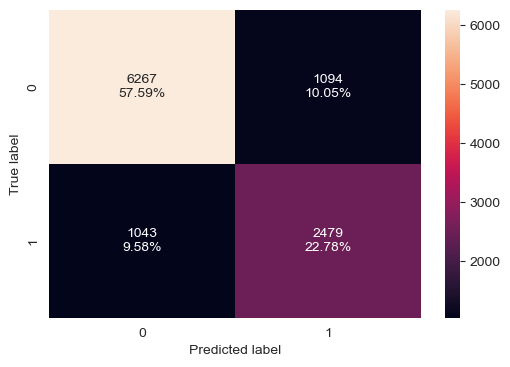

In [457]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test2, y_test, threshold=optimal_threshold_curve)

In [459]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80,0.70,0.69,0.70


In [465]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.371 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.371 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.81,0.79,0.80
Recall,0.63,0.74,0.70
Precision,0.74,0.67,0.70
F1,0.68,0.70,0.70


In [467]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.371 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.371 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80,0.80,0.80
Recall,0.63,0.74,0.70
Precision,0.73,0.67,0.69
F1,0.68,0.70,0.70
